### `Installing Packages`

In [ ]:
#Installing fpp2 (collection of packages like forecast, ggplot2)
# install.packages('fpp2')

In [1]:
#Loading libraries
library(fpp2)
library(dplyr)

Warning message:
"package 'fpp2' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.3"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### `Q1`

In [2]:
help(gold)

In [3]:
# tsdisplay(gold)

In [4]:
help(woolyrnq)

In [5]:
help(gas)

In [6]:
repeat_func <- function(func_name){
    for (i in list(gold, woolyrnq, gas)){
#     print(toString(i))
    print(eval(parse(text = paste0(func_name ,"(", i, ")"))))
}
    }

In [7]:
repeat_func('autoplot')

ERROR: Error: Objects of type numeric not supported by autoplot.


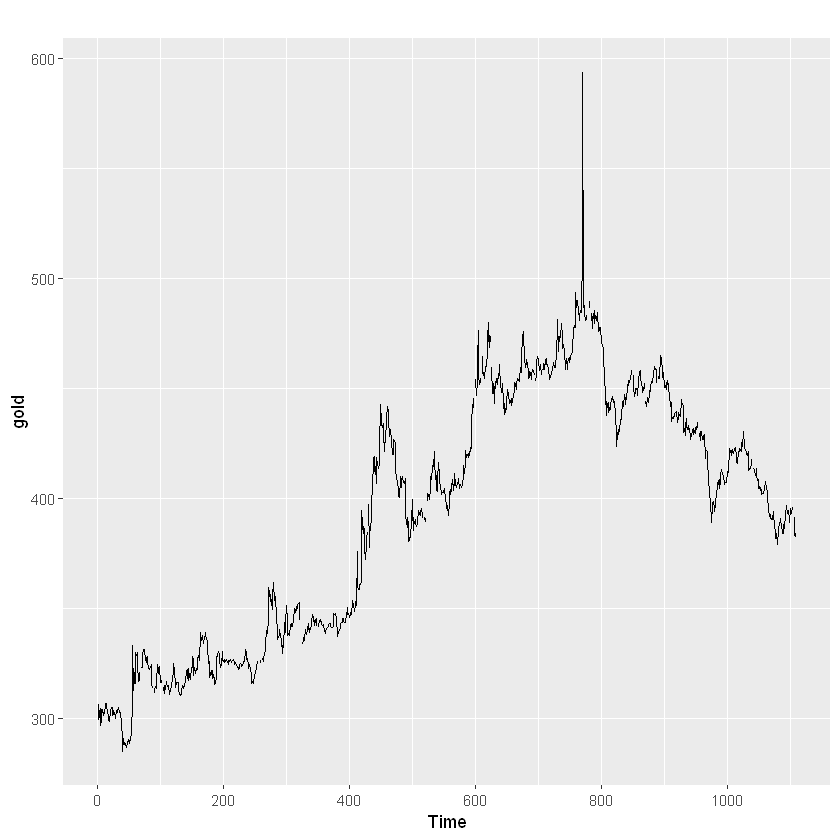

In [8]:
eval(parse(text = paste0("autoplot(", "gold", ")")))

### `Q2`

In [9]:
#Importing data
tute1 <- read.csv("tute1.csv", header=TRUE)
head(tute1)

X,Sales,AdBudget,GDP
Mar-81,1020.2,659.2,251.8
Jun-81,889.2,589.0,290.9
Sep-81,795.0,512.5,290.8
Dec-81,1003.9,614.1,292.4
Mar-82,1057.7,647.2,279.1
Jun-82,944.4,602.0,254.0


In [10]:
#Converting data to timeseries
mytimeseries <- ts(tute1[,-1], start=1981, frequency=4)

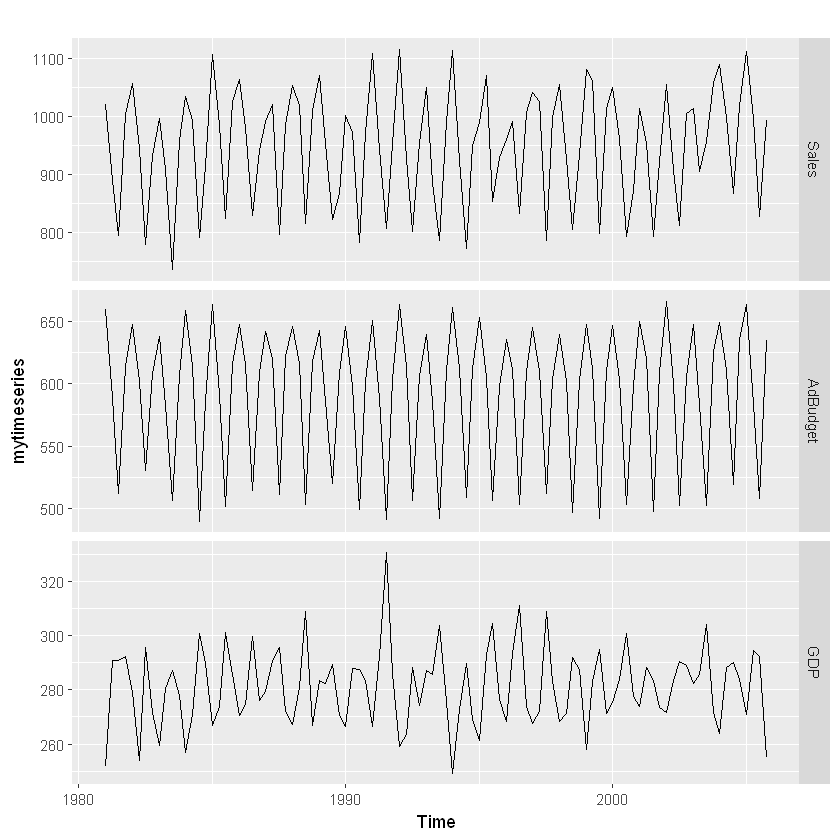

In [11]:
#Timeseries plot
autoplot(mytimeseries, facets=TRUE)

### `Q3`

In [12]:
#Installing package to read excel file
# install.packages("readxl")

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpimW5y0\downloaded_packages


In [13]:
#Loading library
library('readxl')

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [14]:
#Importing data
retaildata <- readxl::read_excel("retail.xlsx", skip=1)

In [15]:
#Inspecting data
head(retaildata)

Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9
1982-09-01,305.4,42.0,64.4,411.8,62.3,97.5,53.6,213.4,89.4,...,465.1,135.5,66.8,130.4,157.2,489.9,144.3,197.6,341.9,3454.3


In [16]:
#Selecting a column and converting to timeseries
myts <- ts(retaildata[,"A3349873A"],frequency=12, start=c(1982,4))

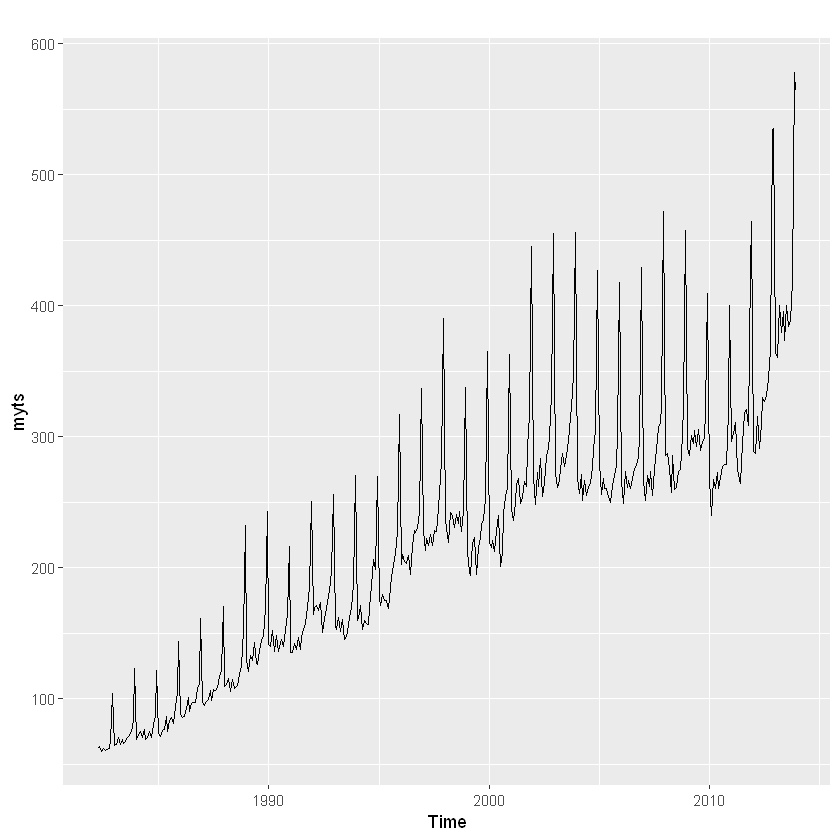

In [17]:
#Inspecting time series by plotting
autoplot(myts)

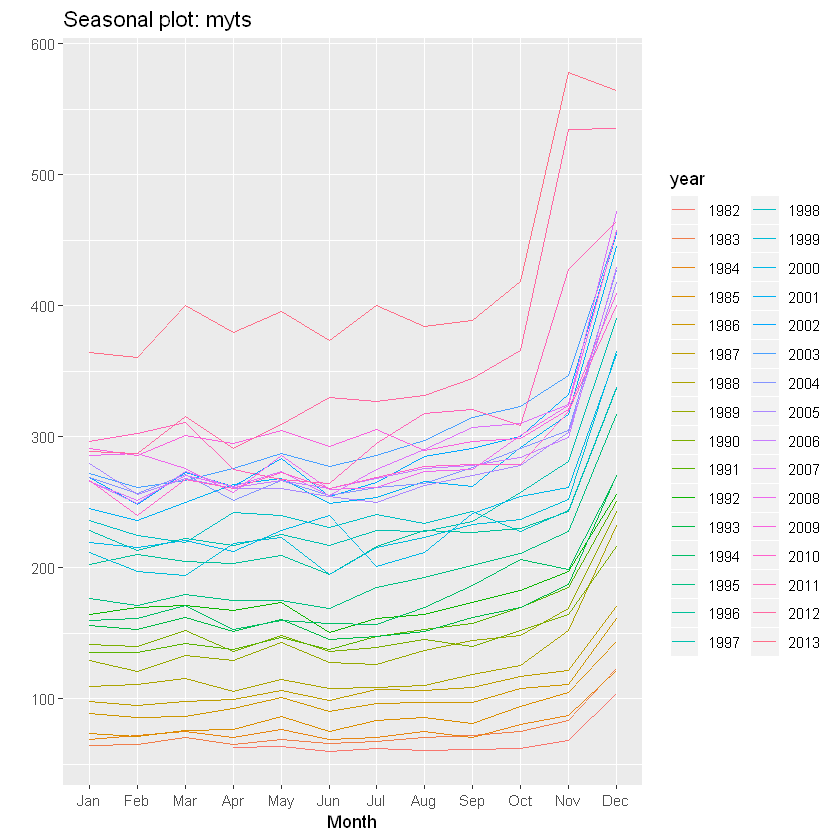

In [18]:
#Inspecting seasonality
ggseasonplot(myts)

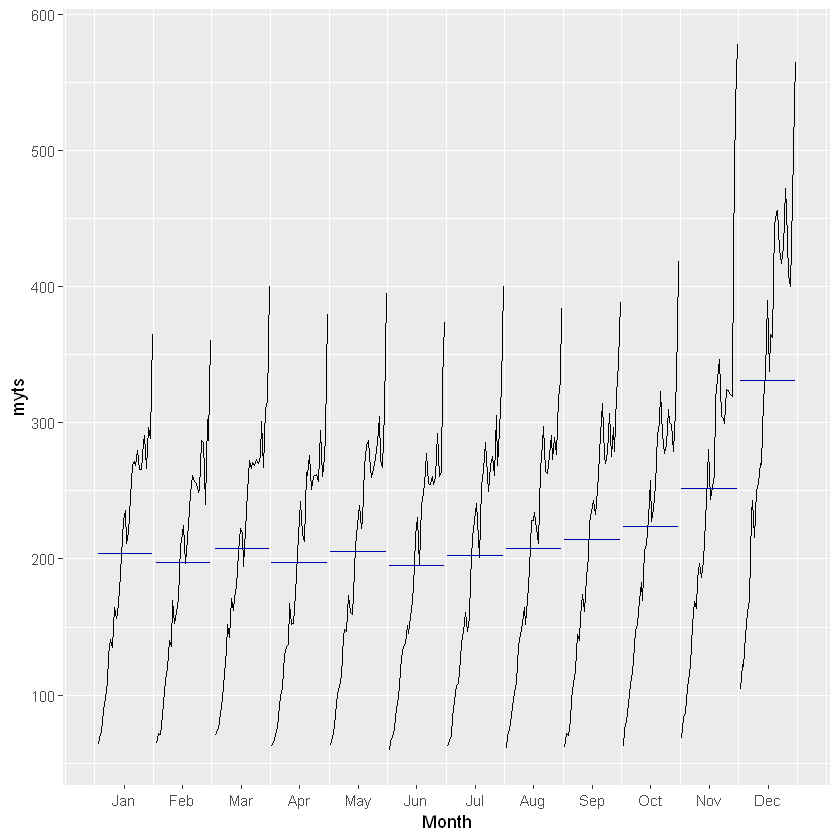

In [19]:
#Inspecting pattern across years for each month
ggsubseriesplot(myts)

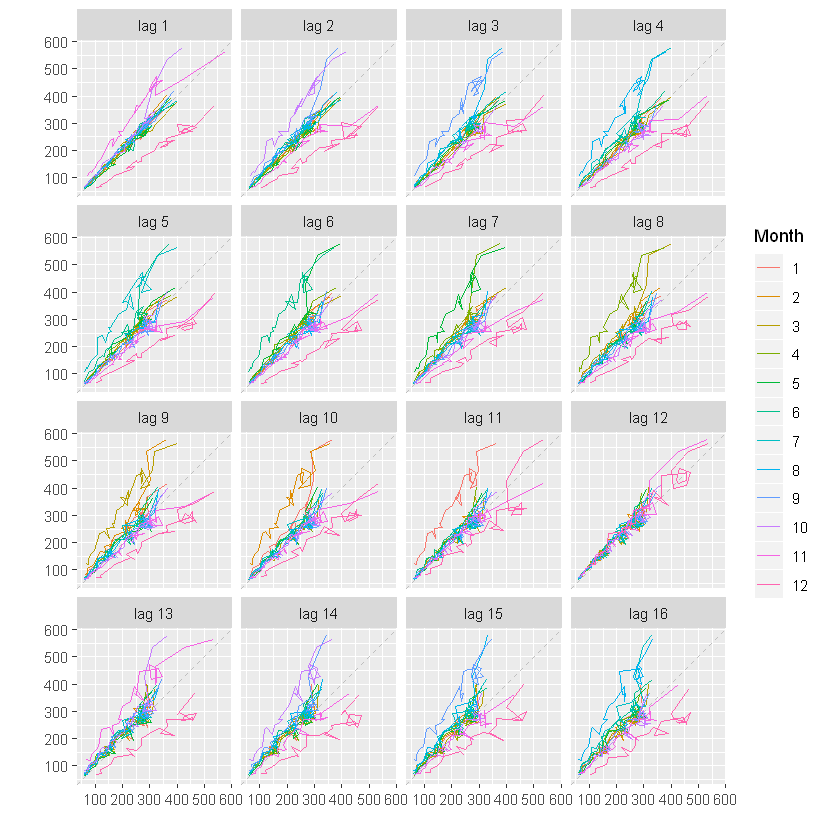

In [20]:
#Inspecting against lags
gglagplot(myts)

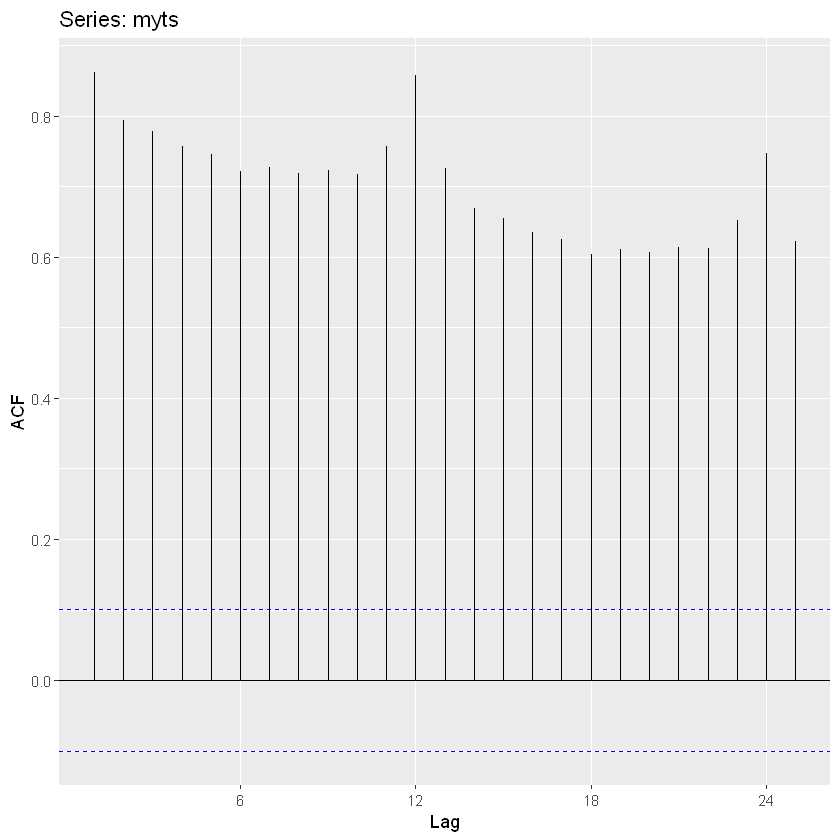

In [21]:
#Autocorrelation plot
ggAcf(myts)

#### From the above plots, we can observe that the following-
> 1. Data has a consistently increasing trend across the years <br>
> 2. There is a clear seasonality which is prominent in the year-end (i.e. Dec)<br>
> 3. The cyclicity comes into effect between 2000 and 2010 flattening out the effect of the trend<br>

### `Q4`

In [38]:
help(bicoal)

Time Series:
Start = 1920 
End = 1968 
Frequency = 1 
 [1] 569 416 422 565 484 520 573 518 501 505 468 382 310 334 359 372 439 446 349
[20] 395 461 511 583 590 620 578 534 631 600 438 516 534 467 457 392 467 500 493
[39] 410 412 416 403 422 459 467 512 534 552 545
Time Series:
Start = 1924 
End = 1993 
Frequency = 1 
 [1] 164.16 169.17 180.65 168.30 180.73 192.55 159.43 150.11 126.05 106.08
[11] 119.92 157.06 156.59 161.21 151.94 137.47 134.10 153.25 166.02 203.24
[21] 194.83 208.18 204.40 171.61 180.87 154.12 133.40 139.22 120.43 119.53
[31]  90.41 100.48  85.16  70.41  70.04  54.59  59.59  48.84  48.78  47.25
[41]  42.90  40.80  43.23  34.23  34.09  38.27  33.90  27.48  31.12  49.16
[51]  28.44  26.60  33.02  29.34  27.49  27.67  19.29  17.65  15.43  18.43
[61]  22.12  19.88  16.48  14.00  11.25  17.38  16.45  15.69  15.25  14.64


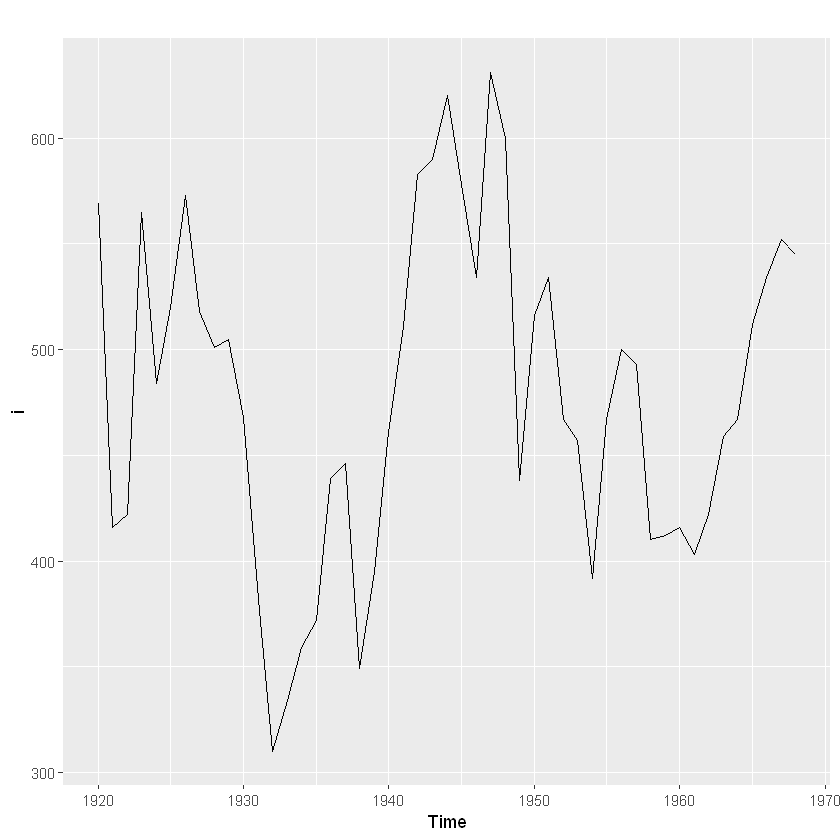

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1956   4742   6128   6494   5379   6011   7003   9164  10333   9614   9545
1957  15711  13135  13077  15453  15995  18071  20291  20175  18975  17928
1958  29856  26879  24485  27745  27282  29418  29908  29278  26002  23826
1959  31486  28207  27669  27559  27924  27528  27410  24887  21904  19598
1960  23781  20020  18177  17732  16765  16310  14897  12940  11465  10364
1961  19257  20941  29718  35025  45110  57154  61499  62090  59561  48531
1962  56755  49740  45870  49136  47256  46324  45453  42333  36851  33952
1963  46178  40482  36394  37142  36424  38188  37174  31869  26575  21758
1964  28649  24226  21955  19937  18287  18129  17072  14924  12491  11160
1965  15831  13698  12111  12690  12585  12855  12137  10977   9993   9614
1966  19490  17611  16206  17560  18082  19482  19200  18918  17375  16122
1967  24911  21969  21956  20944  22200  24002  22951  20143  17187  15287
1968  26943  23735  20744

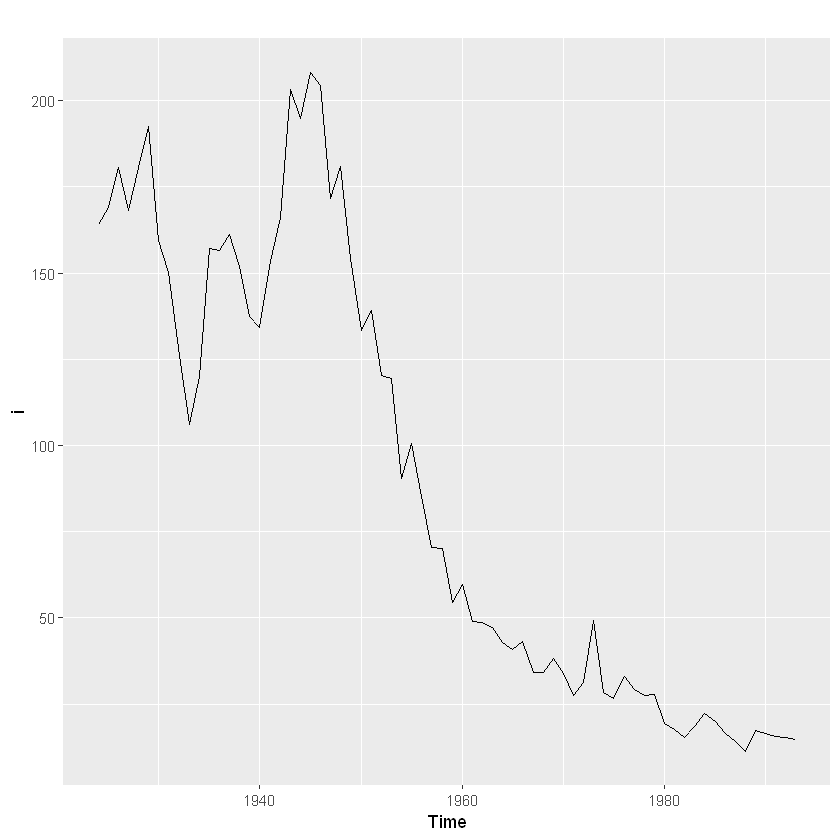

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1973  9007  8106  8928  9137 10017 10826 11317 10744  9713  9938  9161  8927
1974  7750  6981  8038  8422  8714  9512 10120  9823  8743  9129  8710  8680
1975  8162  7306  8124  7870  9387  9556 10093  9620  8285  8433  8160  8034
1976  7717  7461  7776  7925  8634  8945 10078  9179  8037  8488  7874  8647
1977  7792  6957  7726  8106  8890  9299 10625  9302  8314  8850  8265  8796
1978  7836  6892  7791  8129  9115  9434 10484  9827  9110  9070  8633  9240


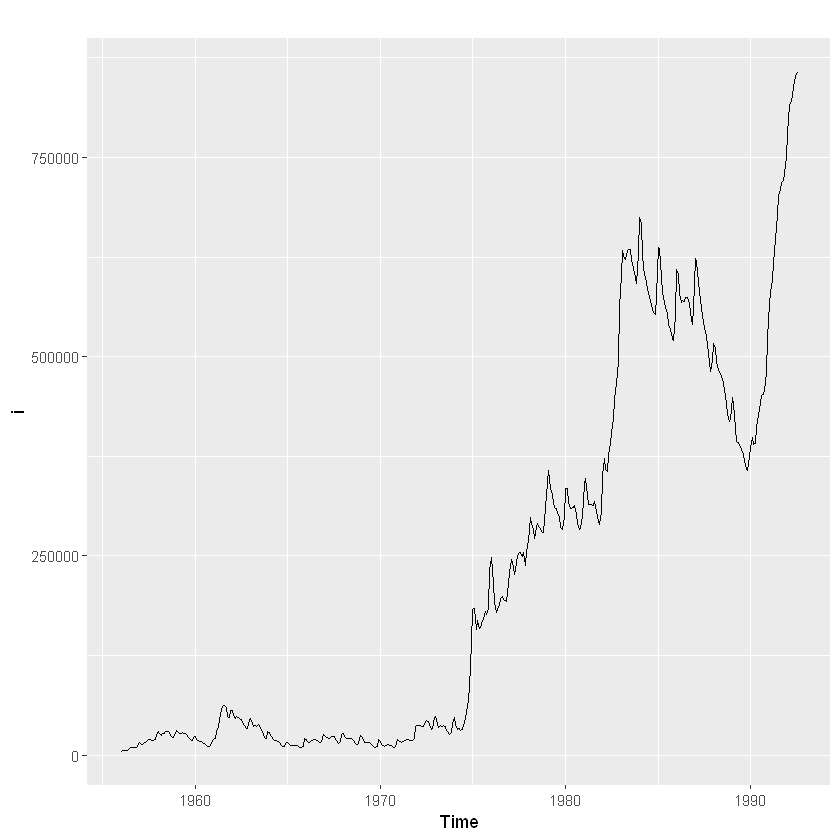

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  269  321  585  871 1475 2821 3928 5943 4950 2577  523   98  184  279  409
 [16] 2285 2685 3409 1824  409  151   45   68  213  546 1033 2129 2536  957  361
 [31]  377  225  360  731 1638 2725 2871 2119  684  299  236  245  552 1623 3311
 [46] 6721 4254  687  255  473  358  784 1594 1676 2251 1426  756  299  201  229
 [61]  469  736 2042 2811 4431 2511  389   73   39   49   59  188  377 1292 4031
 [76] 3495  587  105  153  387  758 1307 3465 6991 6313 3794 1836  345  382  808
 [91] 1388 2713 3800 3091 2985 3790  674   81   80  108  229  399 1132 2432 3574
[106] 2935 1537  529  485  662 1000 1590 2657 3396


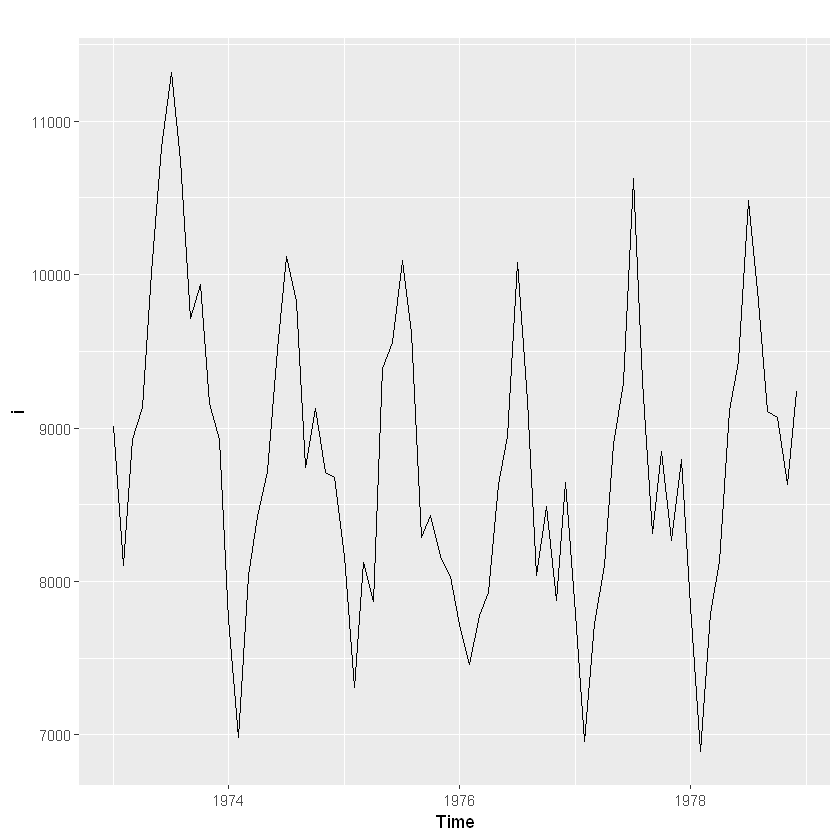

Time Series:
Start = 1 
End = 1000 
Frequency = 1 
   [1] 392.8300 392.5121 397.3059 398.0113 400.4902 408.0957 416.5905 413.0038
   [9] 413.6099 413.0734 414.7127 411.1310 409.9884 408.1156 404.5190 401.2850
  [17] 403.0386 404.7227 403.0088 402.5369 402.2040 403.5851 398.7366 394.5290
  [25] 398.0063 403.8931 400.4952 394.9661 388.9950 384.9214 386.3124 392.5369
  [33] 392.6412 392.4724 388.4386 394.1216 388.7516 380.4803 397.3506 397.4698
  [41] 401.3397 404.0967 401.9358 398.1206 406.8836 409.6208 407.5642 412.1245
  [49] 420.1275 427.9913 425.8453 433.9923 432.9243 437.2710 435.9297 440.6838
  [57] 454.9857 449.0146 451.6524 451.3295 450.5546 441.8363 438.5427 433.8383
  [65] 437.7876 431.3495 432.5666 432.7951 431.0117 426.7742 427.0723 429.5263
  [73] 437.0226 442.2337 437.0623 433.1726 435.6664 434.6927 440.2615 447.4001
  [81] 447.4299 439.5114 437.6187 432.0847 430.3013 434.0022 435.7012 437.3405
  [89] 441.0713 438.3043 440.3510 443.8581 449.6206 449.6952 450.0677 457.1467
 

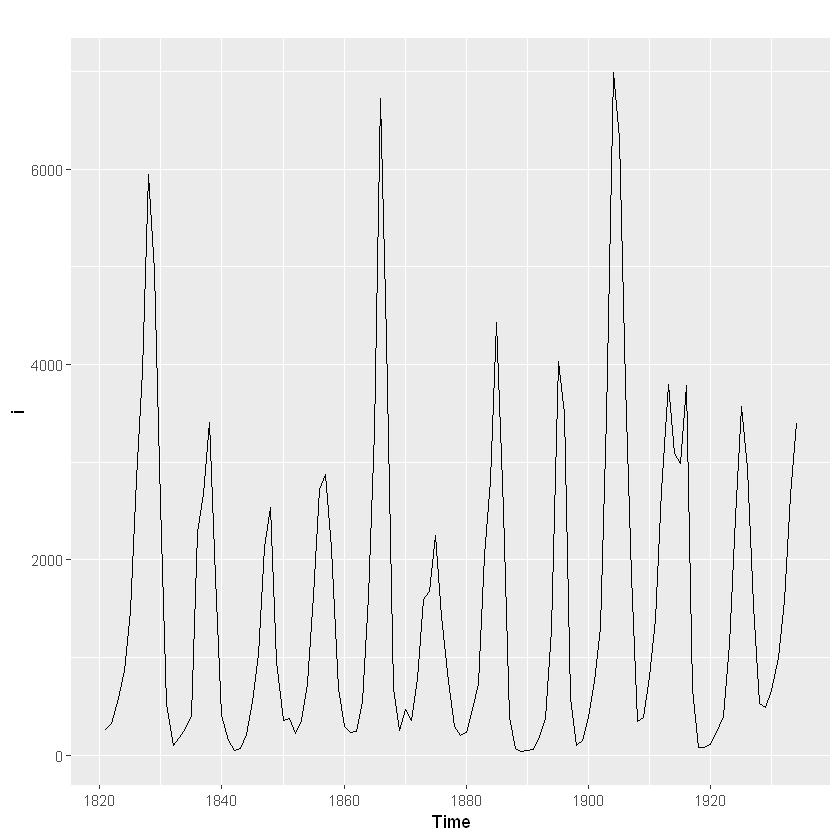

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1968  562.674  599.000  668.516  597.798  579.889  668.233  499.232  215.187
1969  634.712  639.283  712.182  621.557  621.000  675.989  501.322  220.286
1970  646.783  658.442  712.906  687.714  723.916  707.183  629.000  237.530
1971  676.155  748.183  810.681  729.363  701.108  790.079  594.621  230.716
1972  747.636  773.392  813.788  766.713  728.875  749.197  680.954  241.424
1973  795.337  788.421  889.968  797.393  751.000  821.255  691.605  290.655
1974  843.038  847.000  941.952  804.309  840.307  871.528  656.330  370.508
1975  778.139  856.075  938.833  813.023  783.417  828.110  657.311  310.032
1976  895.217  856.075  893.268  875.000  835.088  934.595  832.500  300.000
1977  875.024  992.968  976.804  968.697  871.675 1006.852  832.037  345.587
          Sep      Oct      Nov      Dec
1968  555.813  586.935  546.136  571.111
1969  560.727  602.530  626.379  605.508
1970  613.296  730.444  734.92

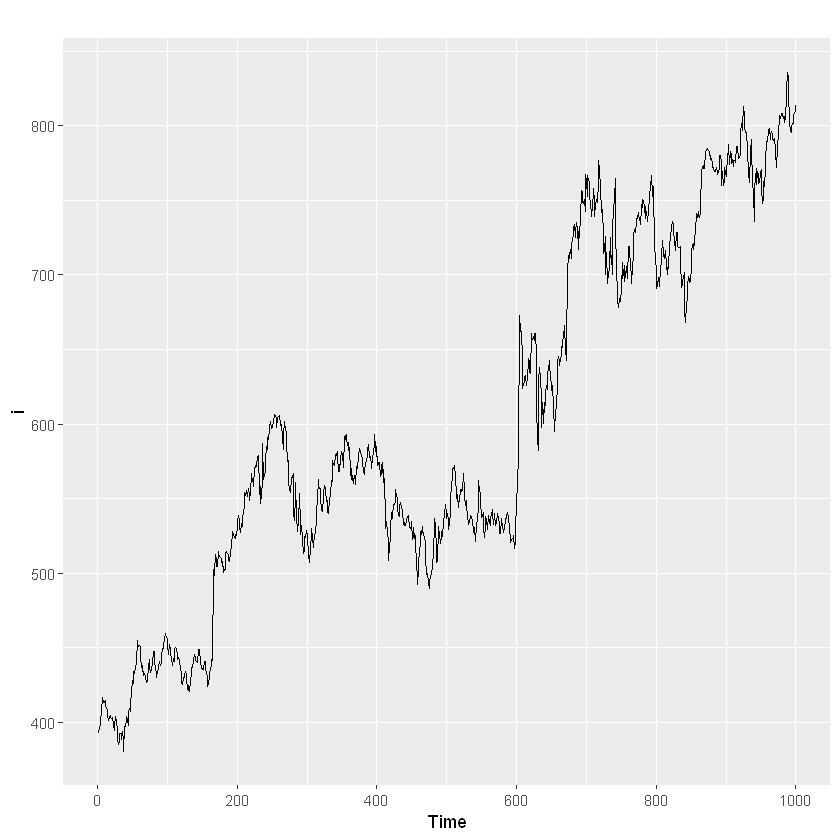

           Jan       Feb       Mar       Apr       May       Jun       Jul
1987   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
1988   2499.81   5198.24   7225.14   4806.03   5900.88   4951.34   6179.12
1989   4717.02   5702.63   9957.58   5304.78   6492.43   6630.80   7349.62
1990   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75   8121.22
1991   4826.64   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55
1992   7615.03   9849.69  14558.40  11587.33   9332.56  13082.09  16732.78
1993  10243.24  11266.88  21826.84  17357.33  15997.79  18601.53  26155.15
           Aug       Sep       Oct       Nov       Dec
1987   3566.34   5021.82   6423.48   7600.60  19756.21
1988   4752.15   5496.43   5835.10  12600.08  28541.72
1989   8176.62   8573.17   9690.50  15151.84  34061.01
1990   7979.25   8093.06   8476.70  17914.66  30114.41
1991  12552.22  11637.39  13606.89  21822.11  45060.69
1992  19888.61  23933.38  25391.35  36024.80  80721.71
1993  28586.52 

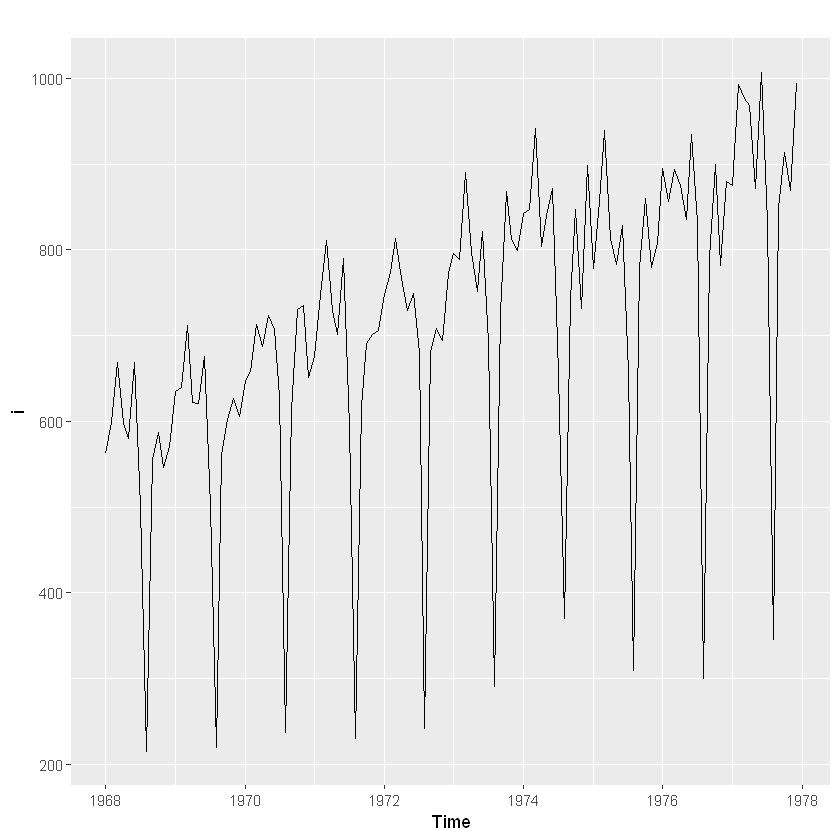

           Jan       Feb       Mar       Apr       May       Jun       Jul
1991                                                              3.526591
1992  5.088335  2.814520  2.985811  3.204780  3.127578  3.270523  3.737851
1993  6.192068  3.450857  3.772307  3.734303  3.905399  4.049687  4.315566
1994  6.731473  3.841278  4.394076  4.075341  4.540645  4.645615  4.752607
1995  6.749484  4.216067  4.949349  4.823045  5.194754  5.170787  5.256742
1996  8.329452  5.069796  5.262557  5.597126  6.110296  5.689161  6.486849
1997  8.524471  5.277918  5.714303  6.214529  6.411929  6.667716  7.050831
1998  8.798513  5.918261  6.534493  6.675736  7.064201  7.383381  7.813496
1999 10.391416  6.421535  8.062619  7.297739  7.936916  8.165323  8.717420
2000 12.511462  7.457199  8.591191  8.474000  9.386803  9.560399 10.834295
2001 14.497581  8.049275 10.312891  9.753358 10.850382  9.961719 11.443601
2002 16.300269  9.053485 10.002449 10.788750 12.106705 10.954101 12.844566
2003 16.828350  9.800215 

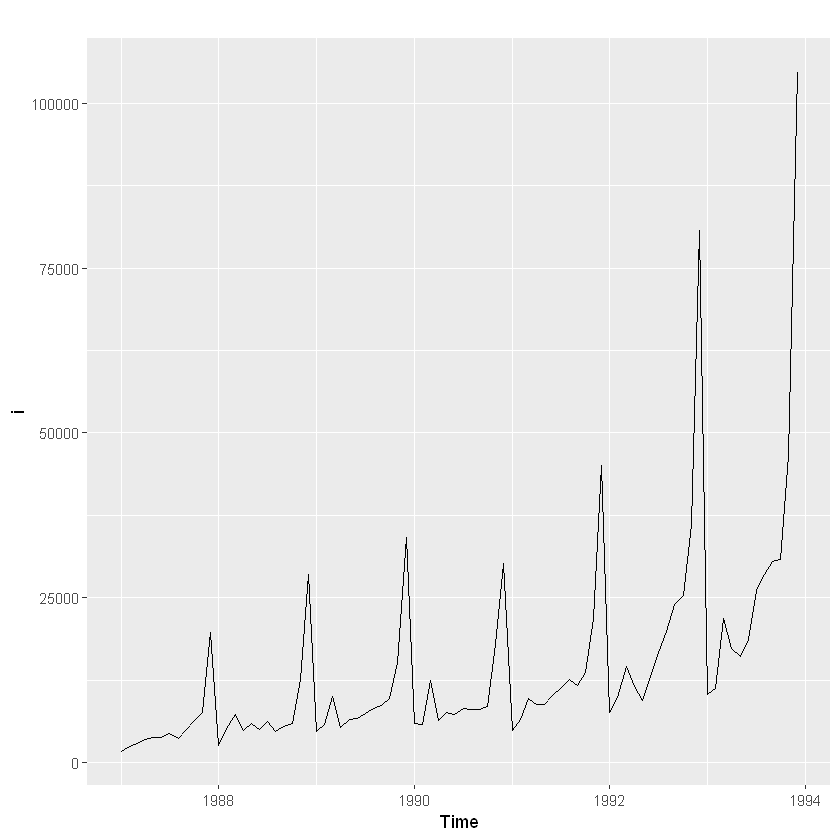

           Jan       Feb       Mar       Apr       May       Jun       Jul
1991                                                             0.4297950
1992 0.6601190 0.3362200 0.3513480 0.3798080 0.3618010 0.4105340 0.4833887
1993 0.7515028 0.3875543 0.4272832 0.4138902 0.4288588 0.4701264 0.5092097
1994 0.8193253 0.4376698 0.5061213 0.4704912 0.5106963 0.5405138 0.5581189
1995 0.8031126 0.4752582 0.5525723 0.5271078 0.5612498 0.5889776 0.6231336
1996 0.9372759 0.5287616 0.5593399 0.5778717 0.6149274 0.5941888 0.7077584
1997 0.8468335 0.4638225 0.4852732 0.5280586 0.5623365 0.5885704 0.6694804
1998 0.8005444 0.4905572 0.5244080 0.5366495 0.5520905 0.6033656 0.6812454
1999 0.8930815 0.5126960 0.6529959 0.5739764 0.6392384 0.7038719 0.7706482
2000 0.9696557 0.5732915 0.6185068 0.6189957 0.6652092 0.7265201 0.8558649
2001 1.0438053 0.5106472 0.6725690 0.6484701 0.7041147 0.6994307 0.8519259
2002 1.1458676 0.5755844 0.6411646 0.6798621 0.7679384 0.7520959 0.9180636
2003 1.0781449 0.5782962 

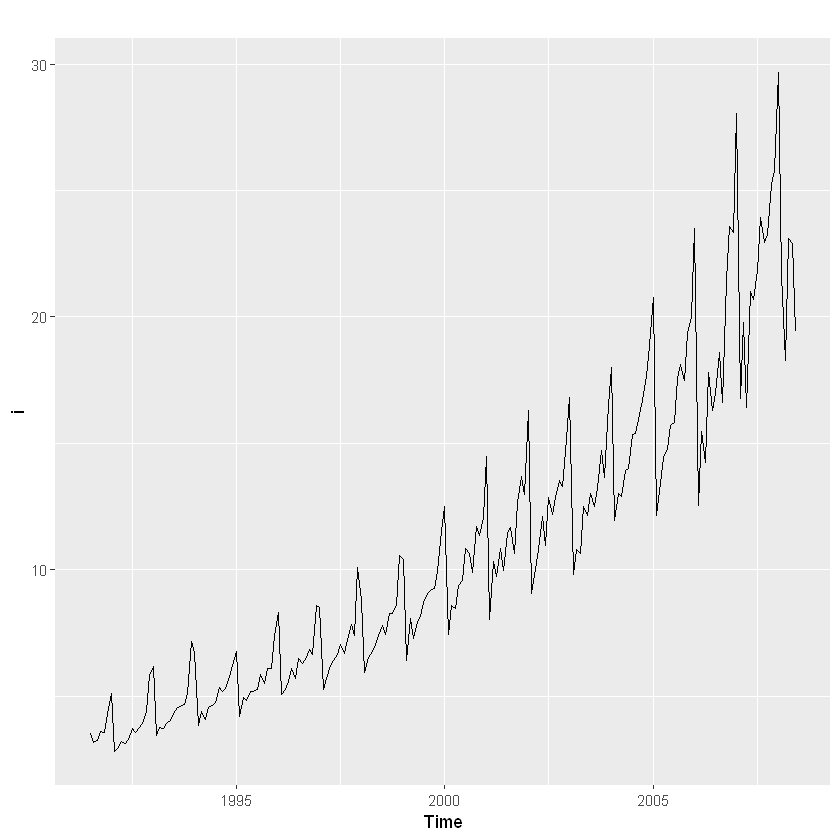

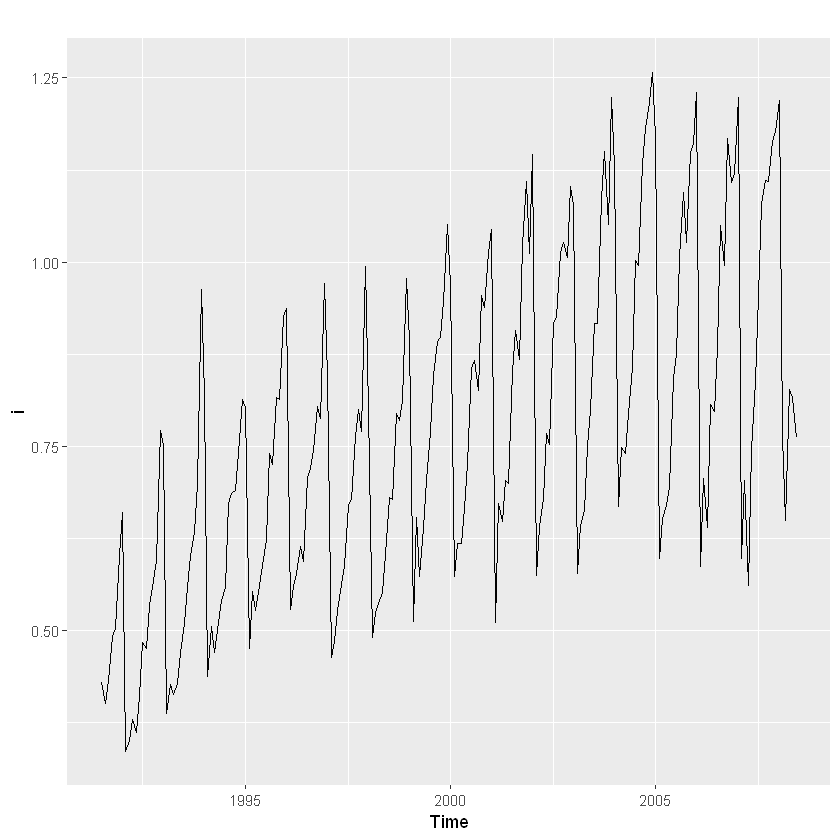

In [35]:
list_series <- list(bicoal, chicken, dole, usdeaths, lynx, goog, writing, fancy, a10, h02)
for (i in list_series){
    print(i)
    print(autoplot(i))
}

### `Q5`

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1968  562.674  599.000  668.516  597.798  579.889  668.233  499.232  215.187
1969  634.712  639.283  712.182  621.557  621.000  675.989  501.322  220.286
1970  646.783  658.442  712.906  687.714  723.916  707.183  629.000  237.530
1971  676.155  748.183  810.681  729.363  701.108  790.079  594.621  230.716
1972  747.636  773.392  813.788  766.713  728.875  749.197  680.954  241.424
1973  795.337  788.421  889.968  797.393  751.000  821.255  691.605  290.655
1974  843.038  847.000  941.952  804.309  840.307  871.528  656.330  370.508
1975  778.139  856.075  938.833  813.023  783.417  828.110  657.311  310.032
1976  895.217  856.075  893.268  875.000  835.088  934.595  832.500  300.000
1977  875.024  992.968  976.804  968.697  871.675 1006.852  832.037  345.587
          Sep      Oct      Nov      Dec
1968  555.813  586.935  546.136  571.111
1969  560.727  602.530  626.379  605.508
1970  613.296  730.444  734.92

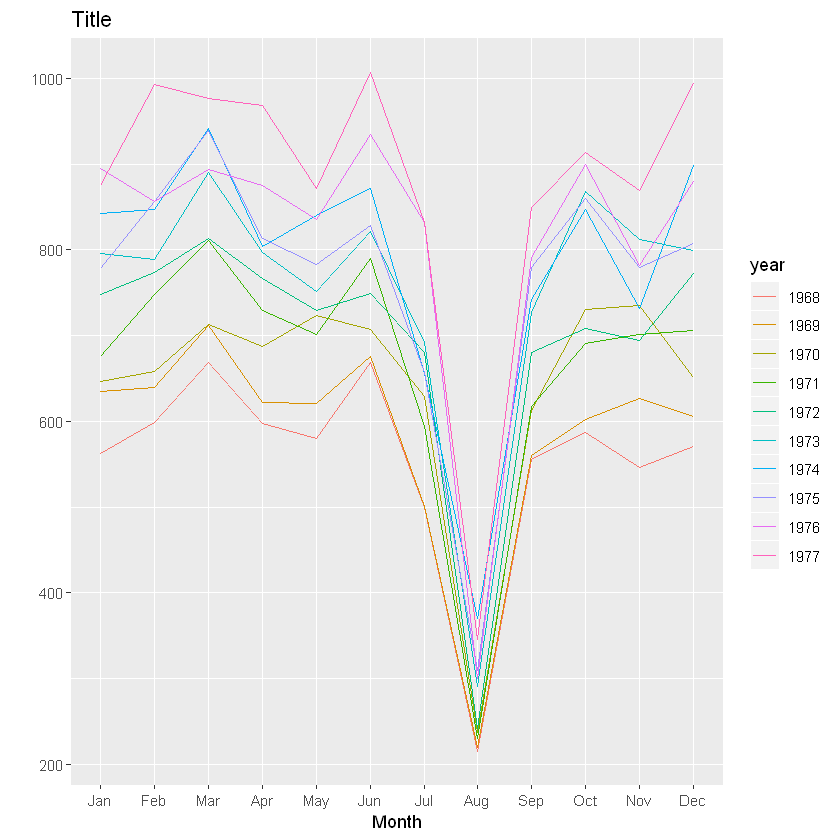

           Jan       Feb       Mar       Apr       May       Jun       Jul
1987   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
1988   2499.81   5198.24   7225.14   4806.03   5900.88   4951.34   6179.12
1989   4717.02   5702.63   9957.58   5304.78   6492.43   6630.80   7349.62
1990   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75   8121.22
1991   4826.64   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55
1992   7615.03   9849.69  14558.40  11587.33   9332.56  13082.09  16732.78
1993  10243.24  11266.88  21826.84  17357.33  15997.79  18601.53  26155.15
           Aug       Sep       Oct       Nov       Dec
1987   3566.34   5021.82   6423.48   7600.60  19756.21
1988   4752.15   5496.43   5835.10  12600.08  28541.72
1989   8176.62   8573.17   9690.50  15151.84  34061.01
1990   7979.25   8093.06   8476.70  17914.66  30114.41
1991  12552.22  11637.39  13606.89  21822.11  45060.69
1992  19888.61  23933.38  25391.35  36024.80  80721.71
1993  28586.52 

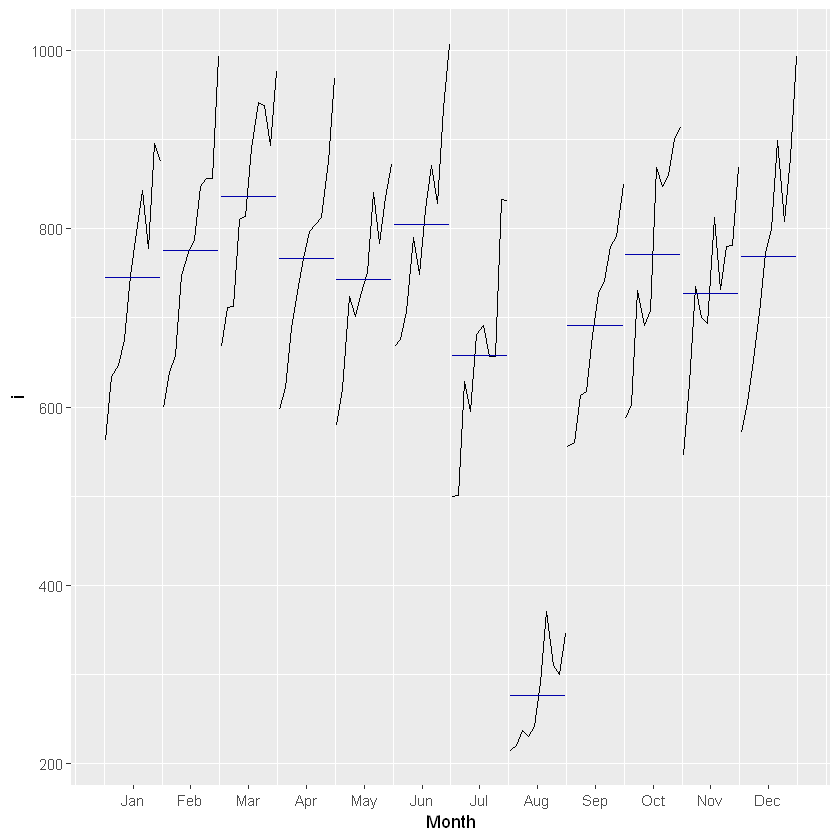

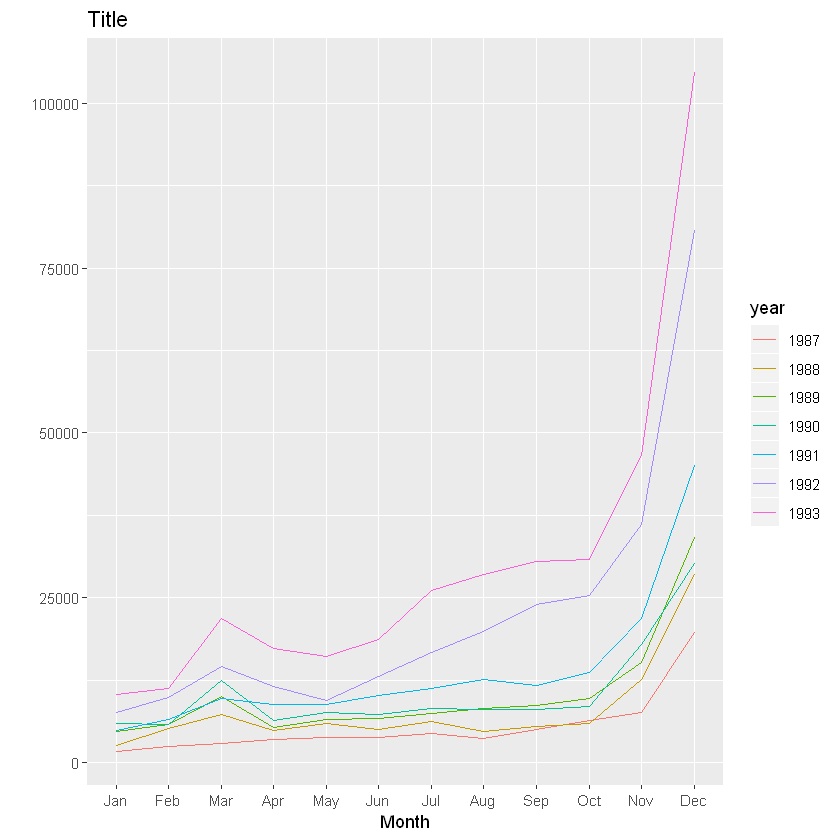

           Jan       Feb       Mar       Apr       May       Jun       Jul
1991                                                              3.526591
1992  5.088335  2.814520  2.985811  3.204780  3.127578  3.270523  3.737851
1993  6.192068  3.450857  3.772307  3.734303  3.905399  4.049687  4.315566
1994  6.731473  3.841278  4.394076  4.075341  4.540645  4.645615  4.752607
1995  6.749484  4.216067  4.949349  4.823045  5.194754  5.170787  5.256742
1996  8.329452  5.069796  5.262557  5.597126  6.110296  5.689161  6.486849
1997  8.524471  5.277918  5.714303  6.214529  6.411929  6.667716  7.050831
1998  8.798513  5.918261  6.534493  6.675736  7.064201  7.383381  7.813496
1999 10.391416  6.421535  8.062619  7.297739  7.936916  8.165323  8.717420
2000 12.511462  7.457199  8.591191  8.474000  9.386803  9.560399 10.834295
2001 14.497581  8.049275 10.312891  9.753358 10.850382  9.961719 11.443601
2002 16.300269  9.053485 10.002449 10.788750 12.106705 10.954101 12.844566
2003 16.828350  9.800215 

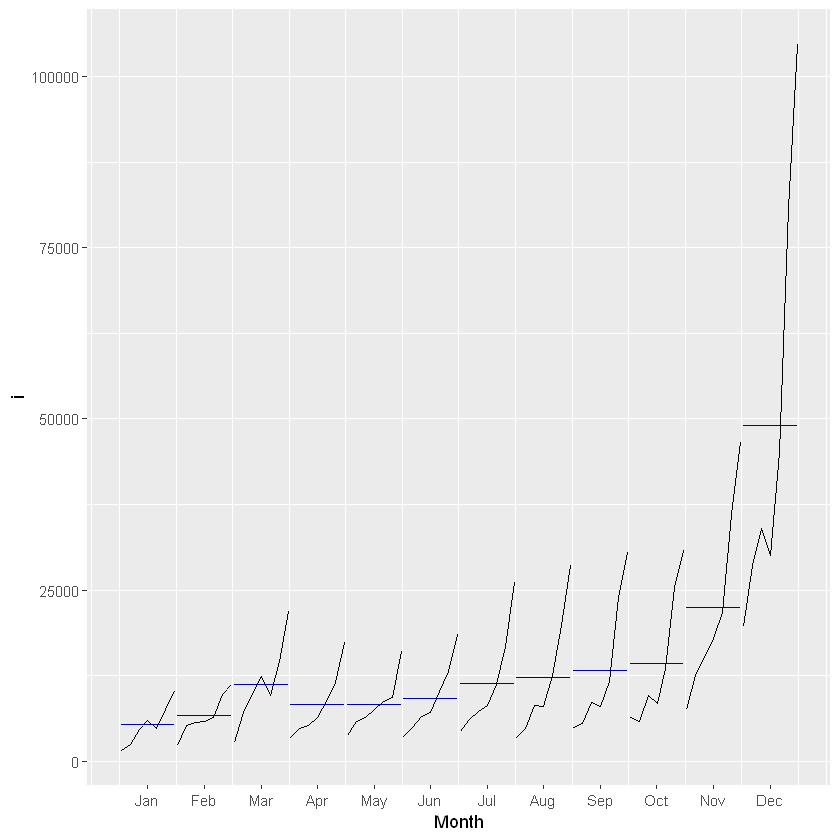

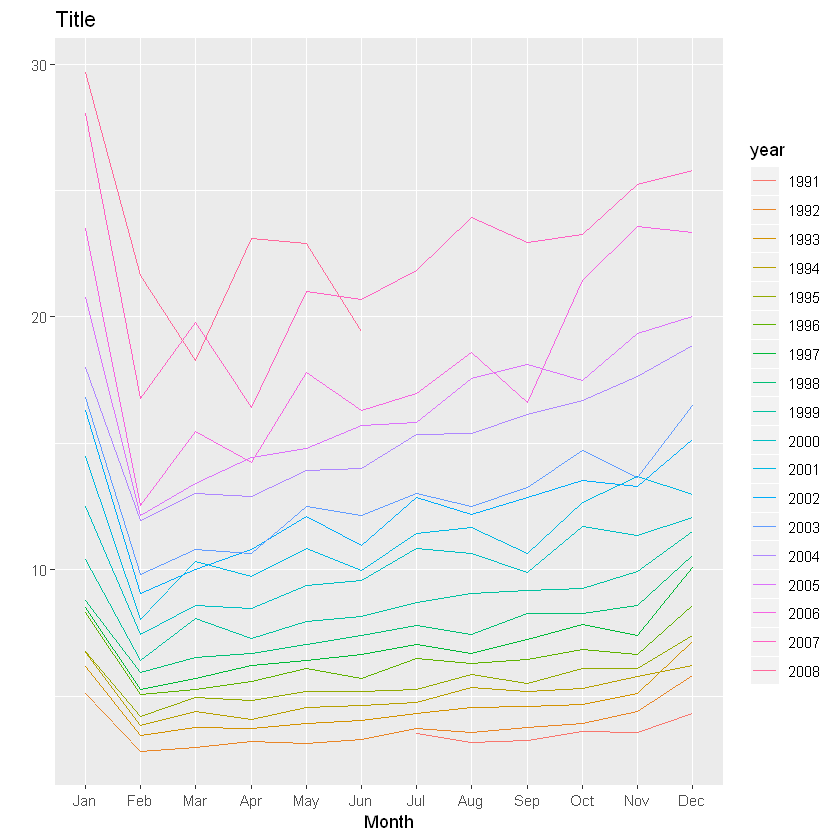

           Jan       Feb       Mar       Apr       May       Jun       Jul
1991                                                             0.4297950
1992 0.6601190 0.3362200 0.3513480 0.3798080 0.3618010 0.4105340 0.4833887
1993 0.7515028 0.3875543 0.4272832 0.4138902 0.4288588 0.4701264 0.5092097
1994 0.8193253 0.4376698 0.5061213 0.4704912 0.5106963 0.5405138 0.5581189
1995 0.8031126 0.4752582 0.5525723 0.5271078 0.5612498 0.5889776 0.6231336
1996 0.9372759 0.5287616 0.5593399 0.5778717 0.6149274 0.5941888 0.7077584
1997 0.8468335 0.4638225 0.4852732 0.5280586 0.5623365 0.5885704 0.6694804
1998 0.8005444 0.4905572 0.5244080 0.5366495 0.5520905 0.6033656 0.6812454
1999 0.8930815 0.5126960 0.6529959 0.5739764 0.6392384 0.7038719 0.7706482
2000 0.9696557 0.5732915 0.6185068 0.6189957 0.6652092 0.7265201 0.8558649
2001 1.0438053 0.5106472 0.6725690 0.6484701 0.7041147 0.6994307 0.8519259
2002 1.1458676 0.5755844 0.6411646 0.6798621 0.7679384 0.7520959 0.9180636
2003 1.0781449 0.5782962 

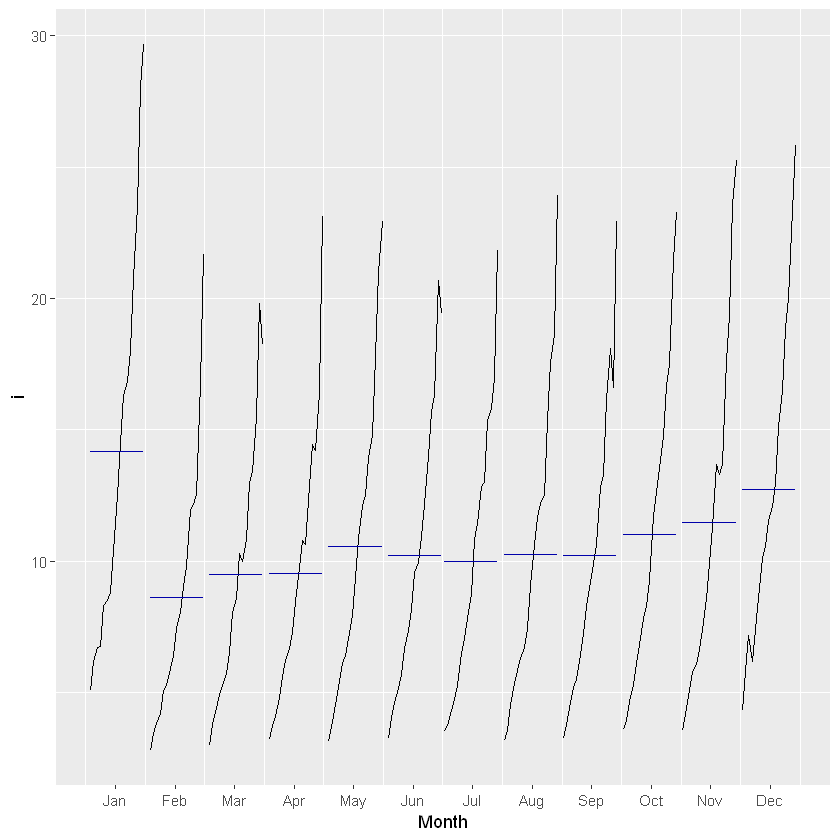

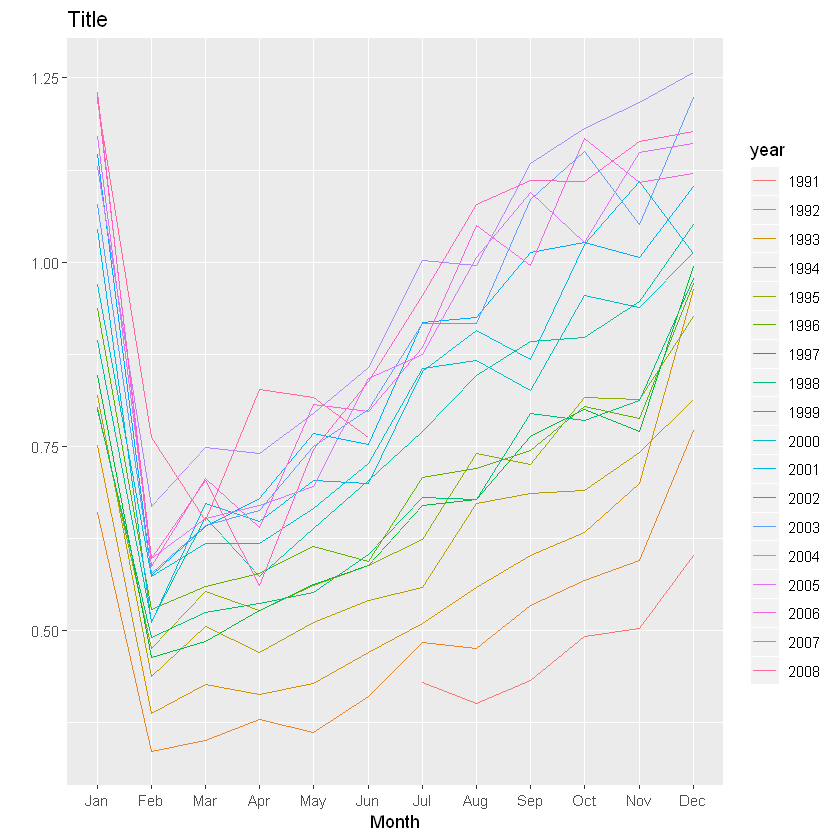

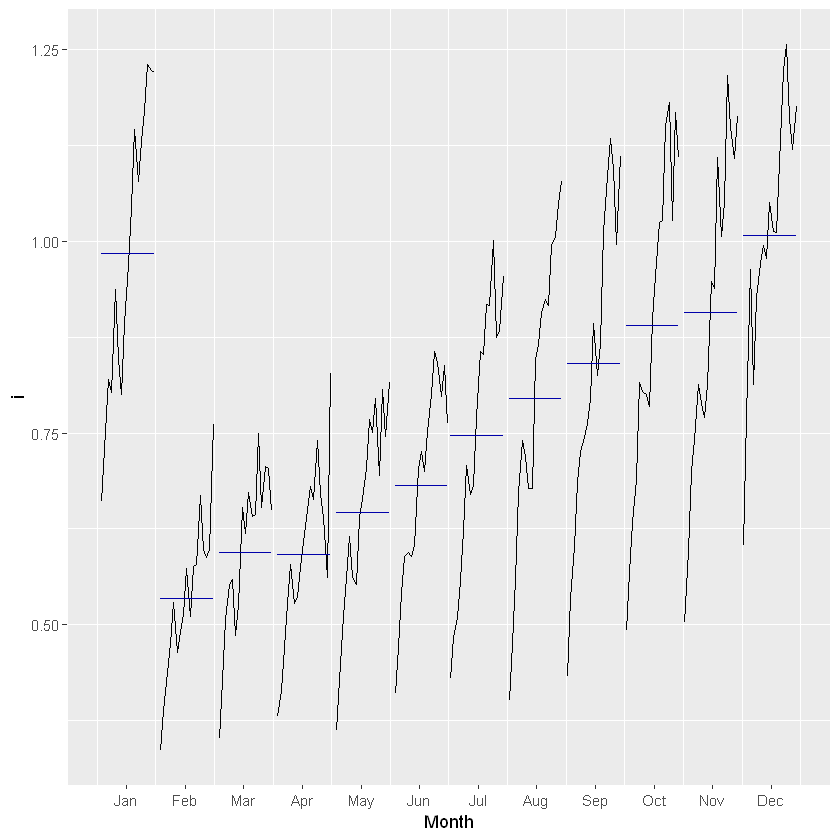

In [48]:
list_series <- list(bicoal, chicken, dole, usdeaths, lynx, goog, writing, fancy, a10, h02)
for (i in list_series[7:10]){
    print(i)
    print(ggseasonplot(i) + ggtitle('Title'))
    print(ggsubseriesplot(i))
}

### `Q6`

In [54]:
#Creating list of all the series to reduce manual typing
series_list2 = list(hsales, usdeaths, bricksq, sunspotarea, gasoline)

In [55]:
#Creating function for analyzing the above series
analyze_ts <- function(ts_series){
    print(autoplot(ts_series))
    print(ggseasonplot(ts_series))
    print(ggsubseriesplot(ts_series))
    print(gglagplot(ts_series))
    print(ggAcf(ts_series))
}

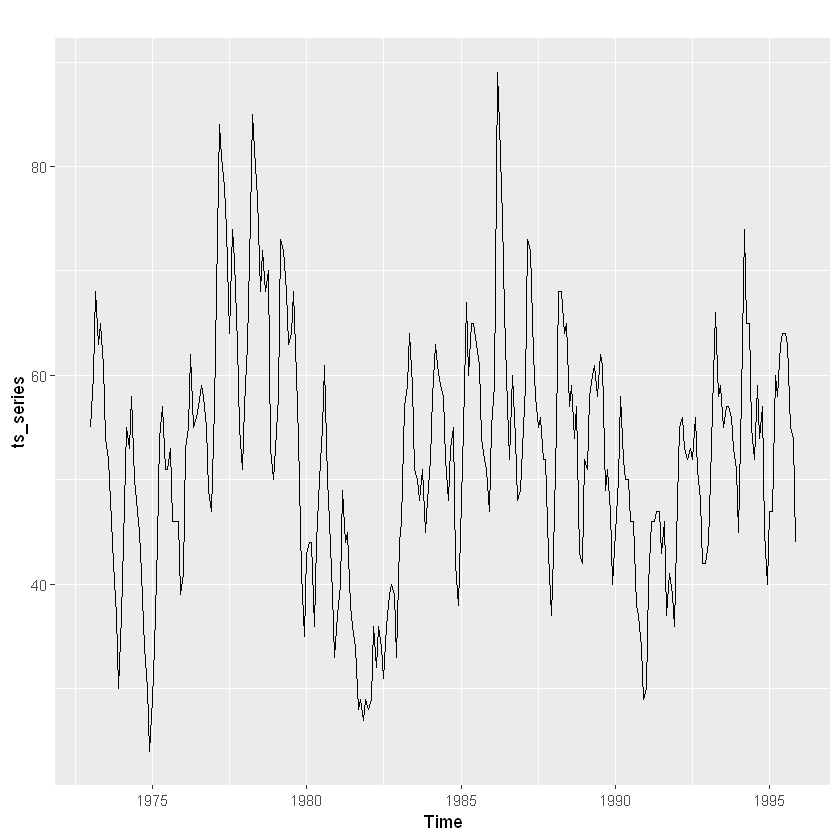

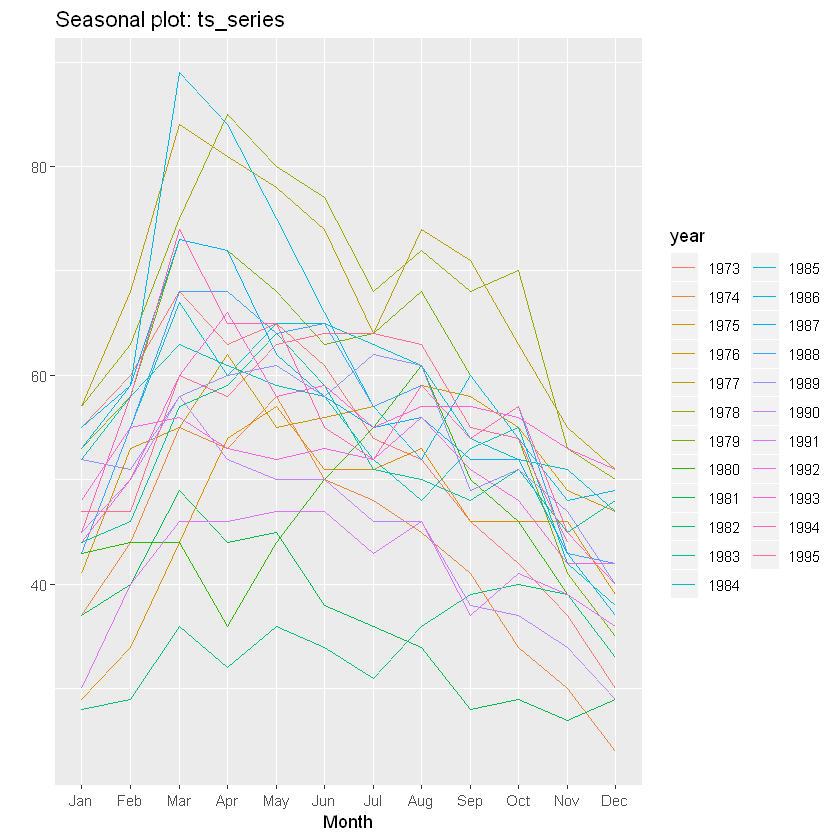

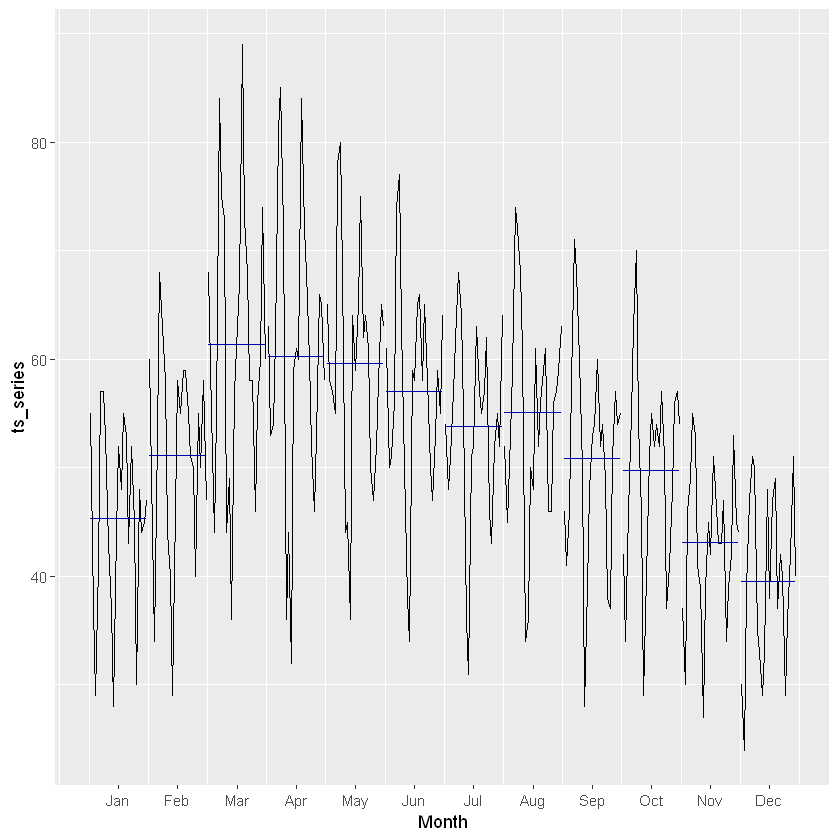

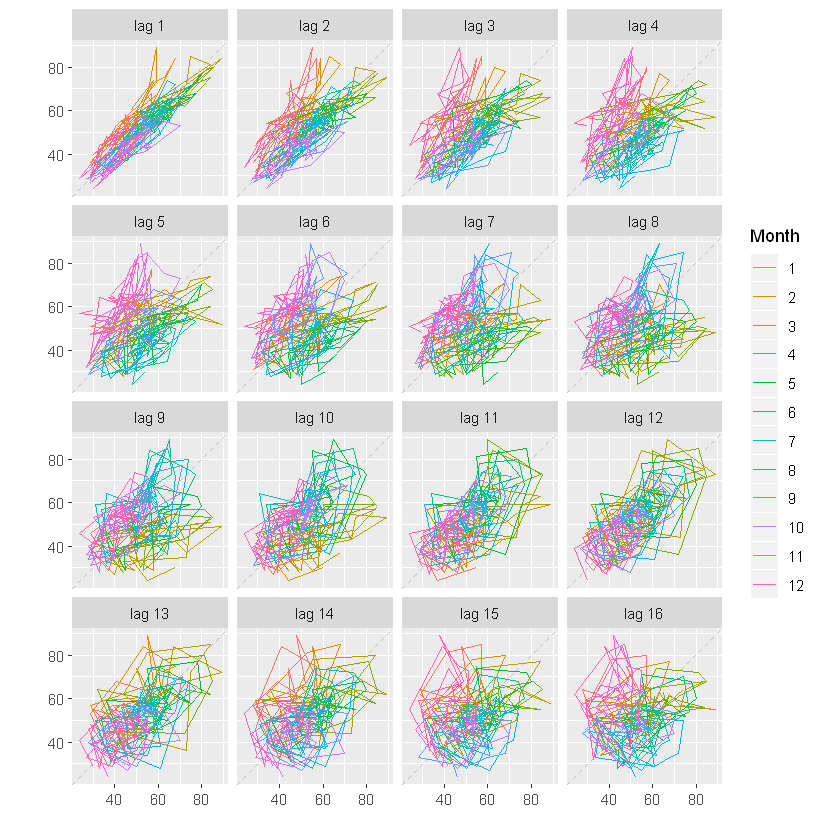

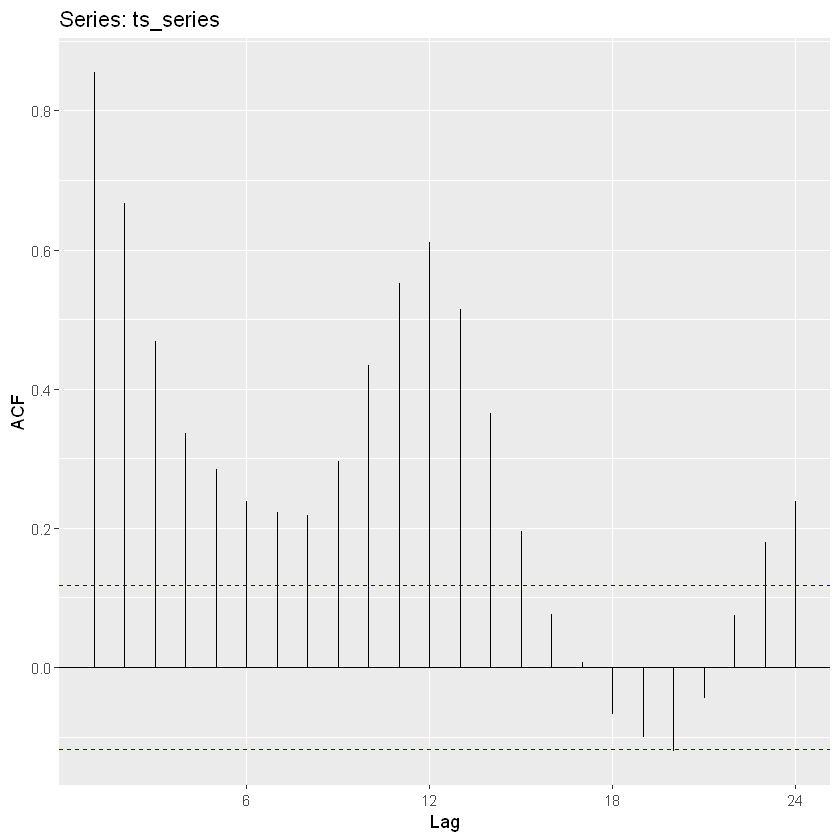

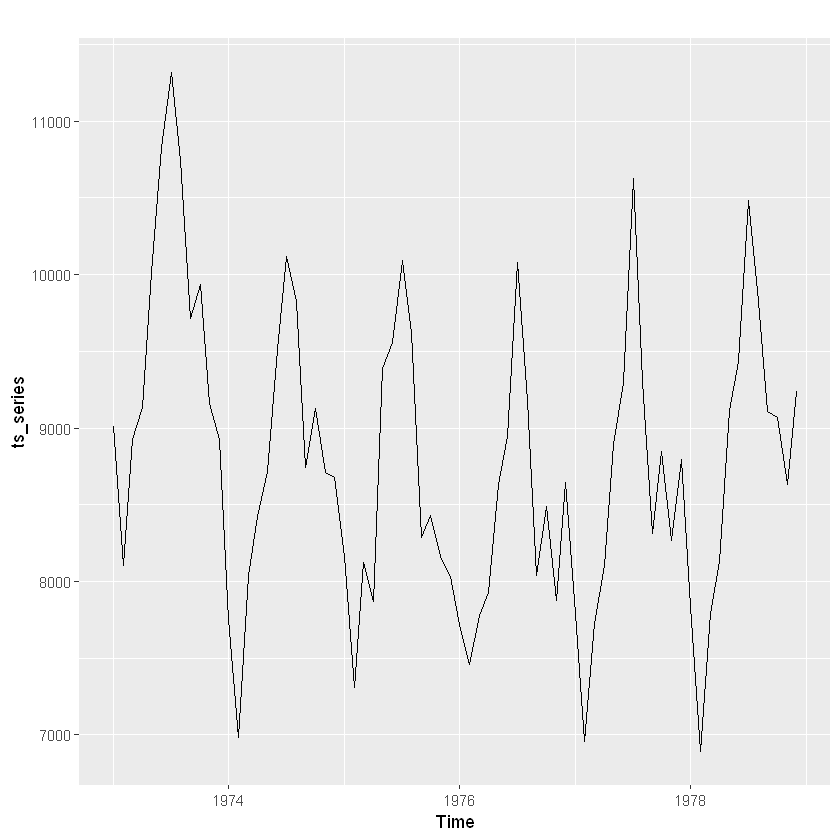

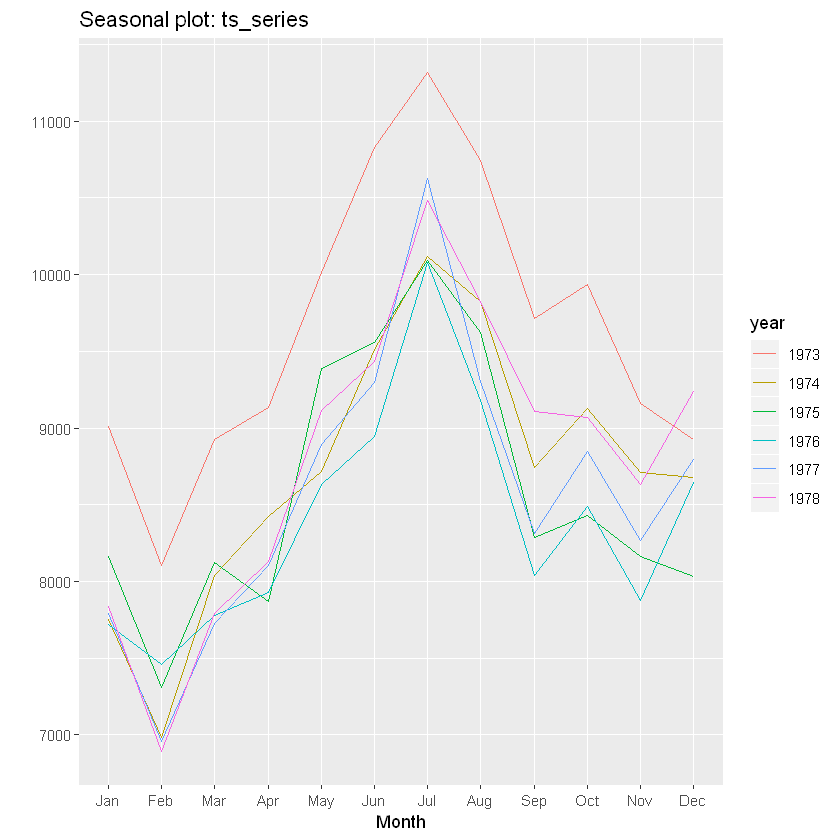

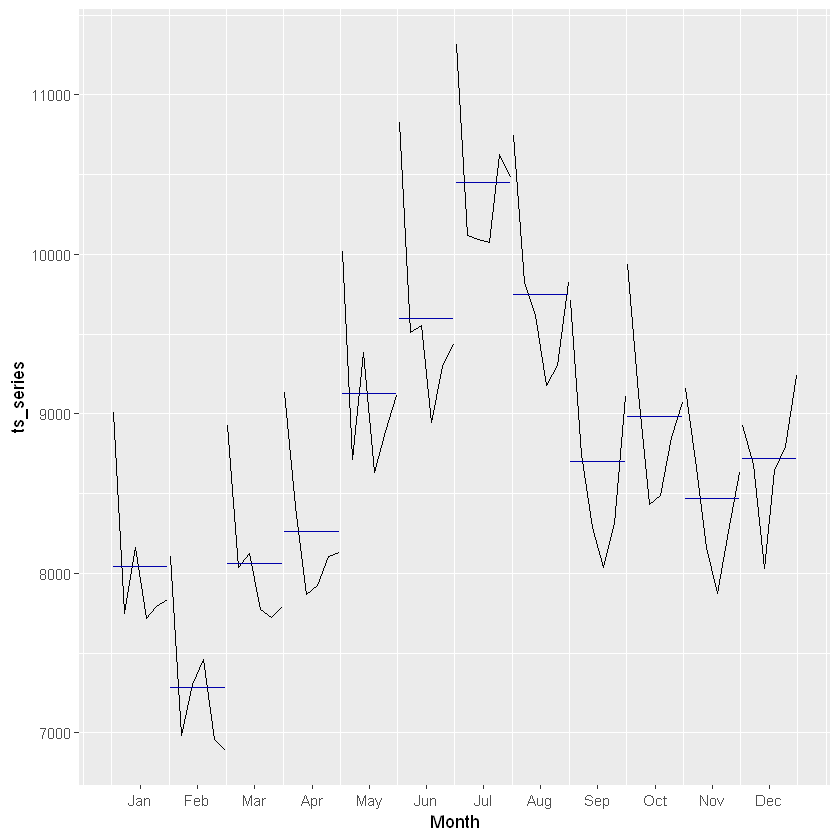

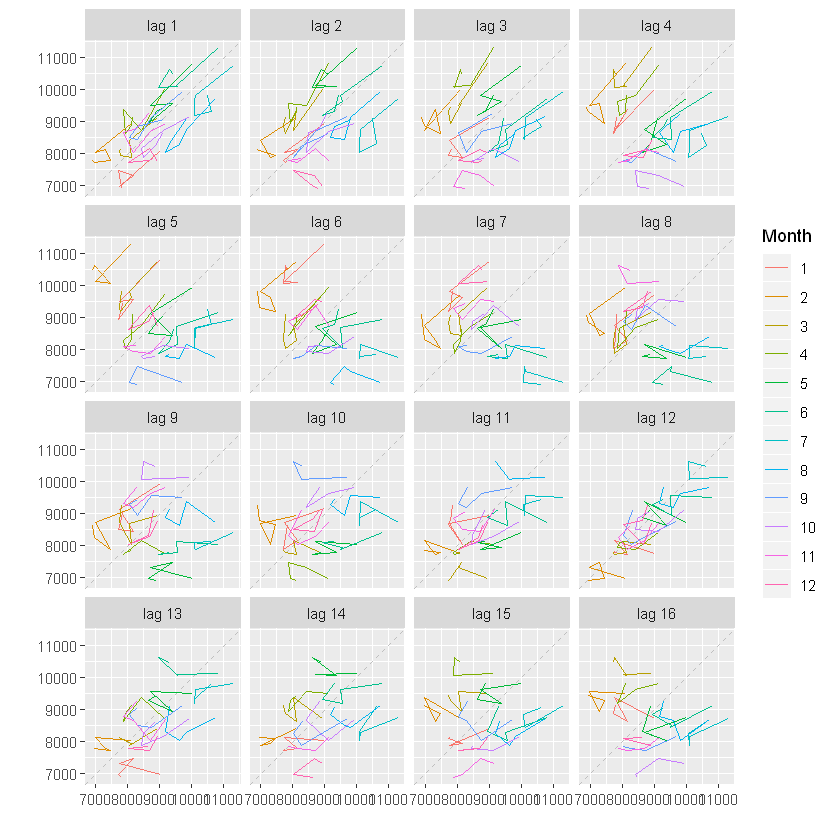

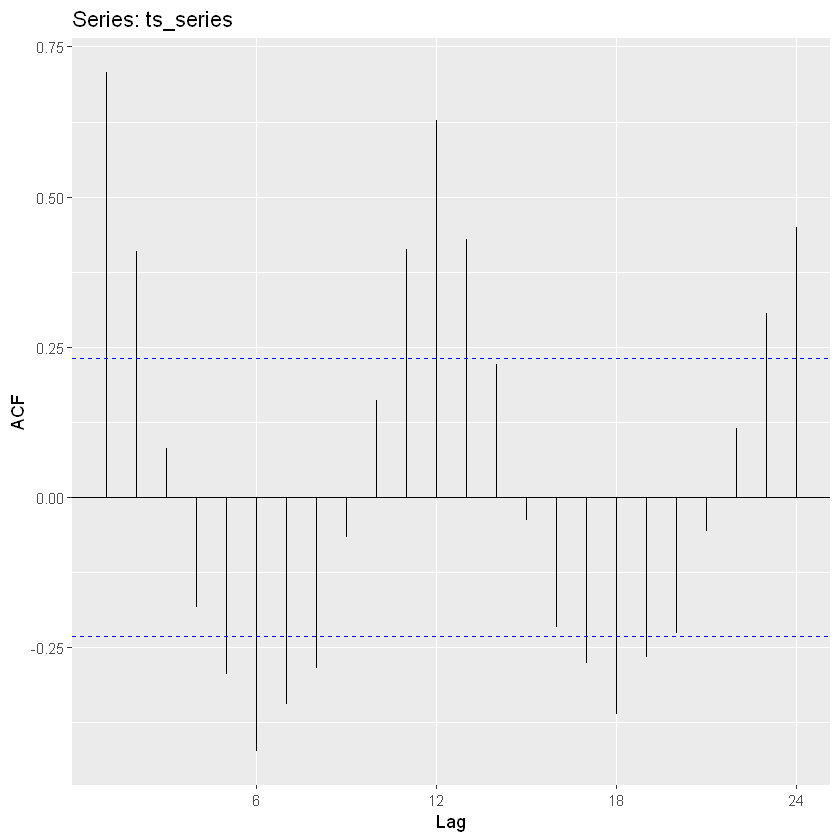

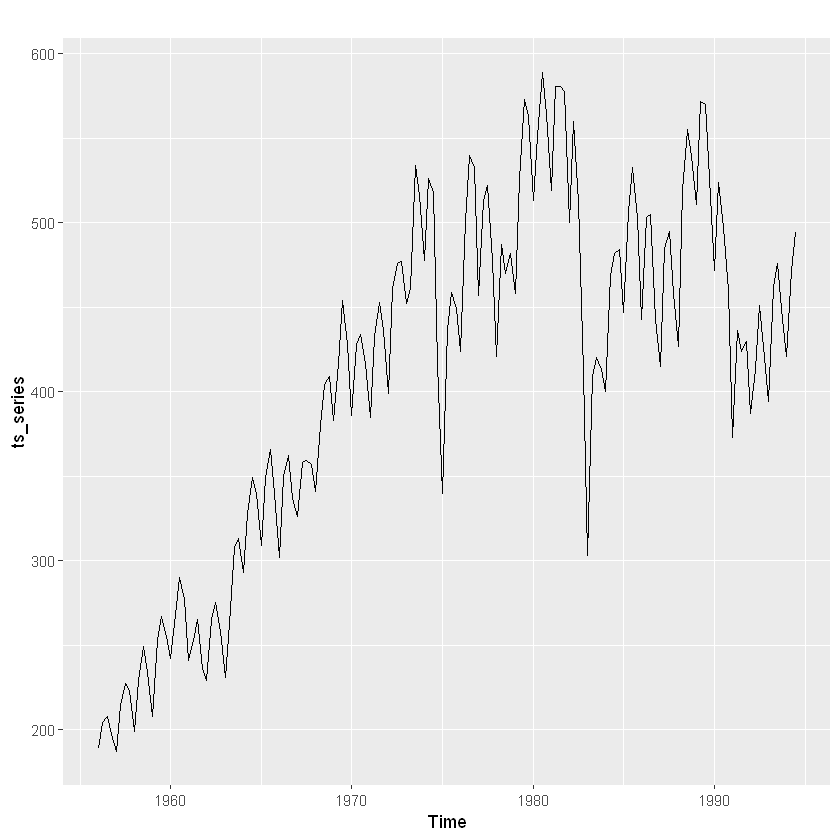

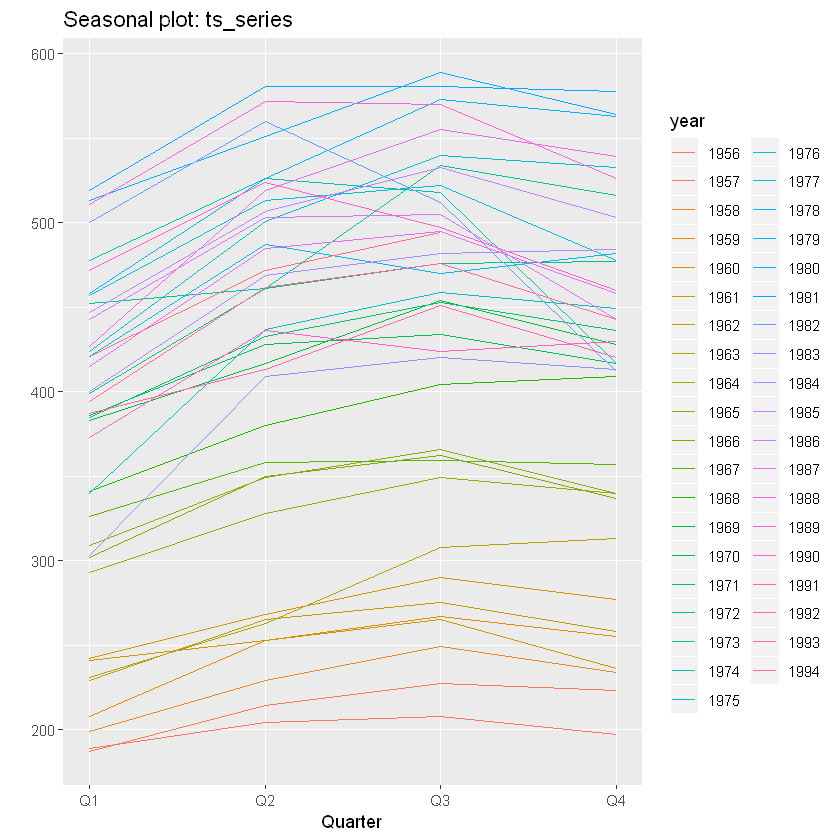

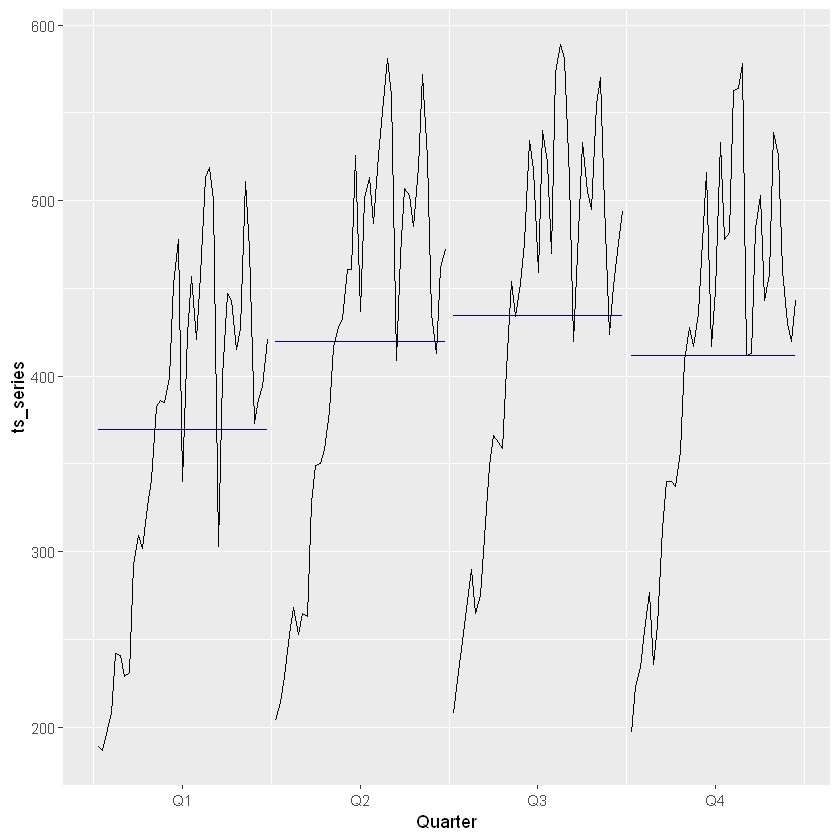

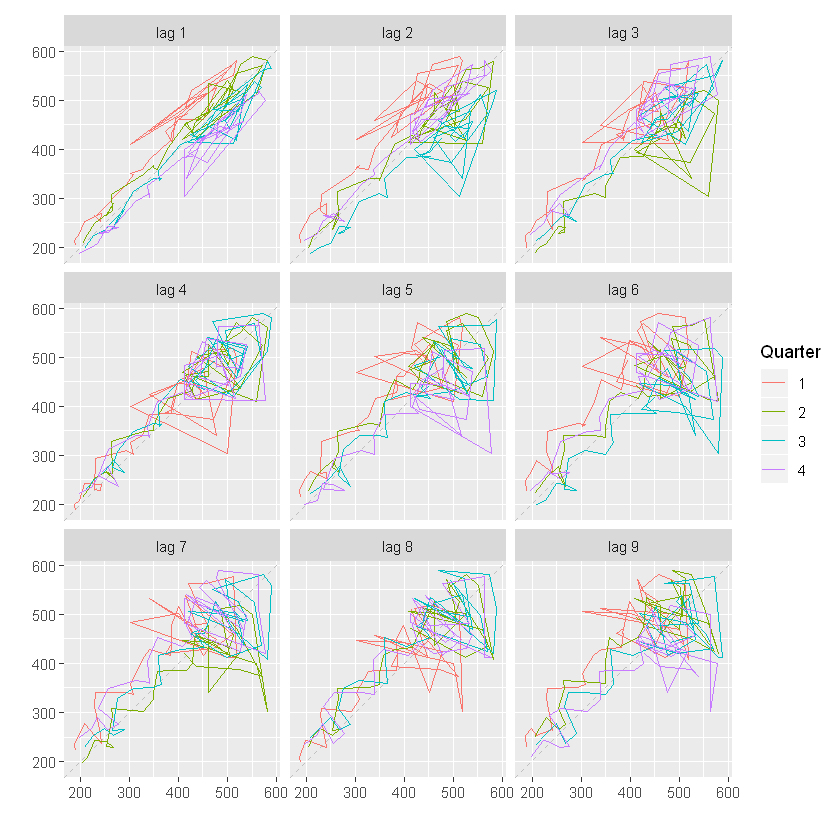

ERROR: Error in ggseasonplot(ts_series): Data are not seasonal


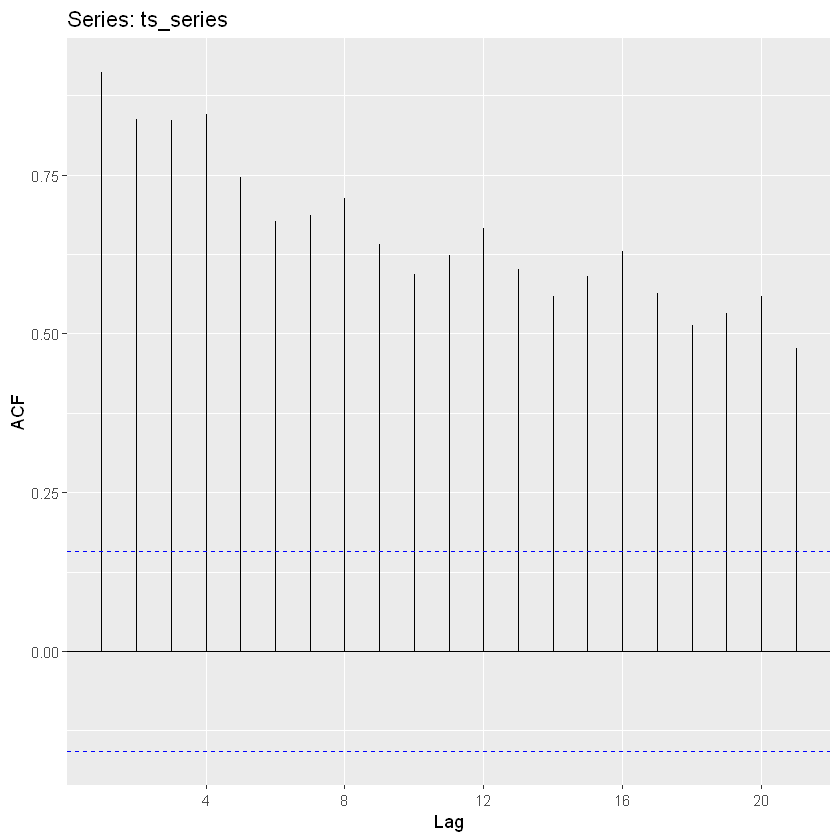

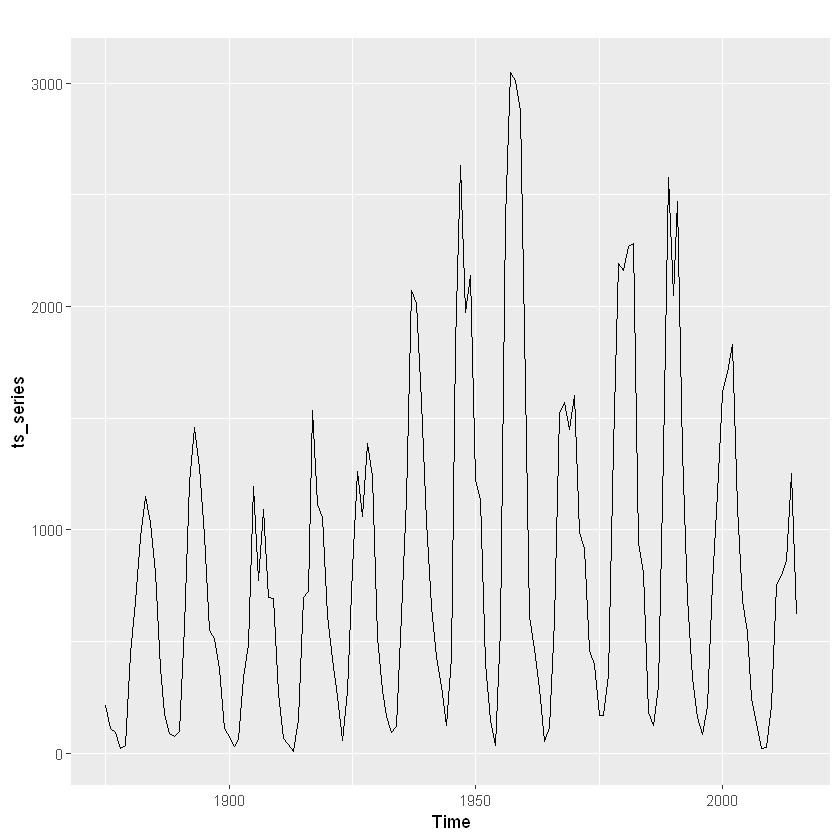

In [58]:
#Analyzing all series
for (i in series_list2){
    analyze_ts(i)
}

### `Q7`

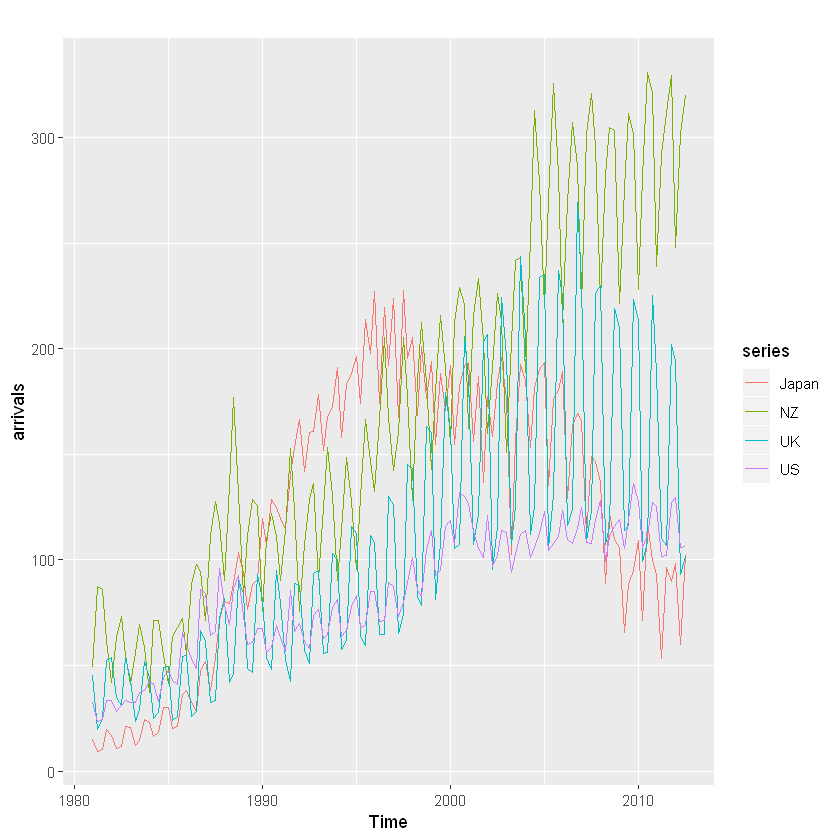

In [62]:
#Analyzing arrivals data
autoplot(arrivals)

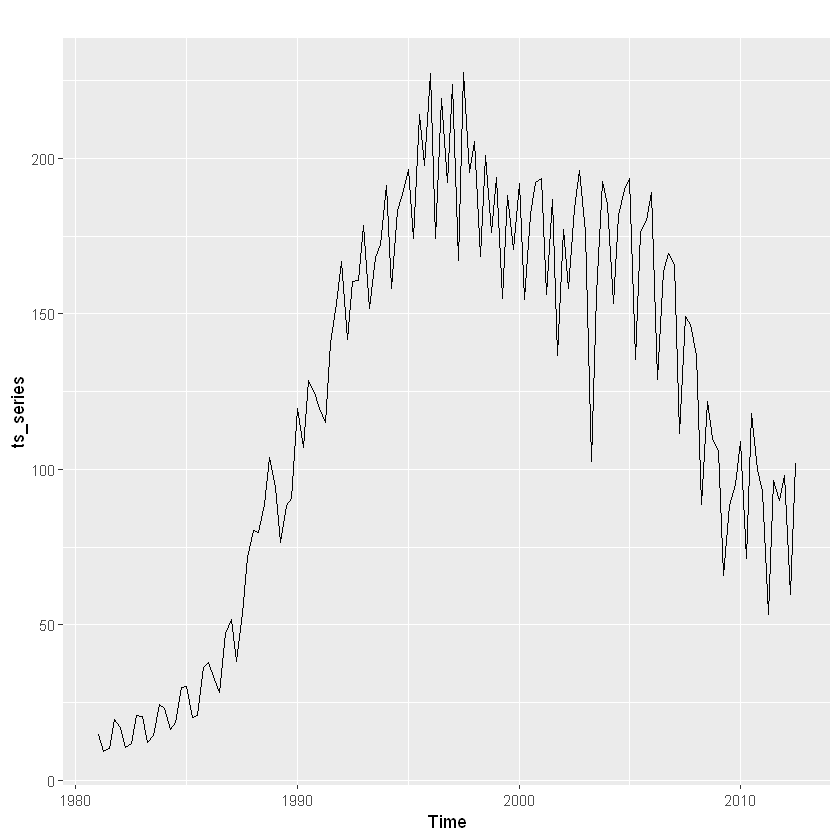

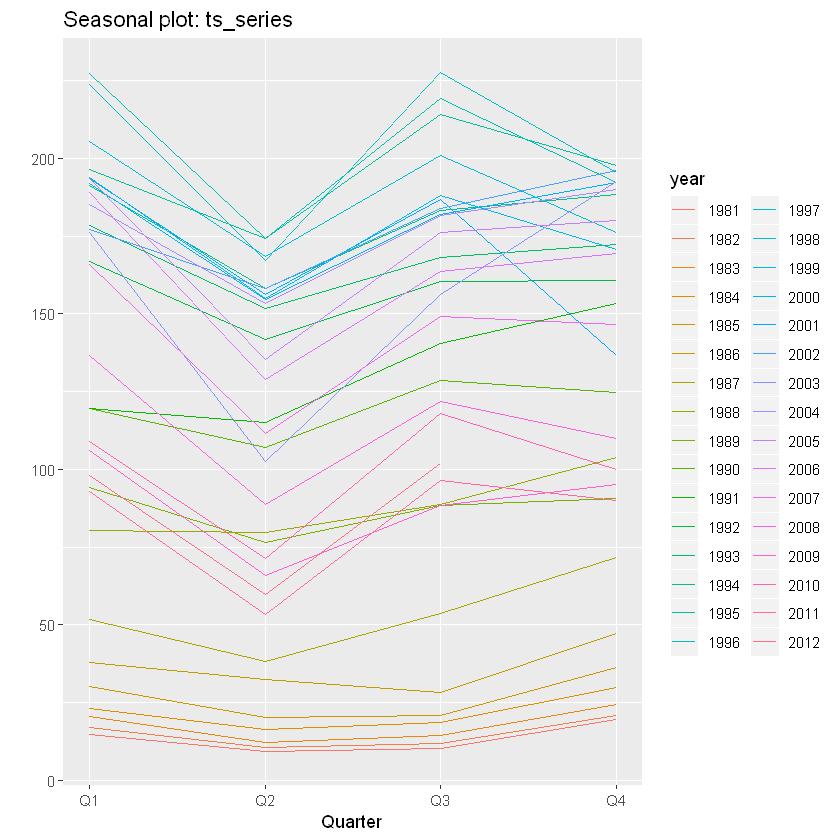

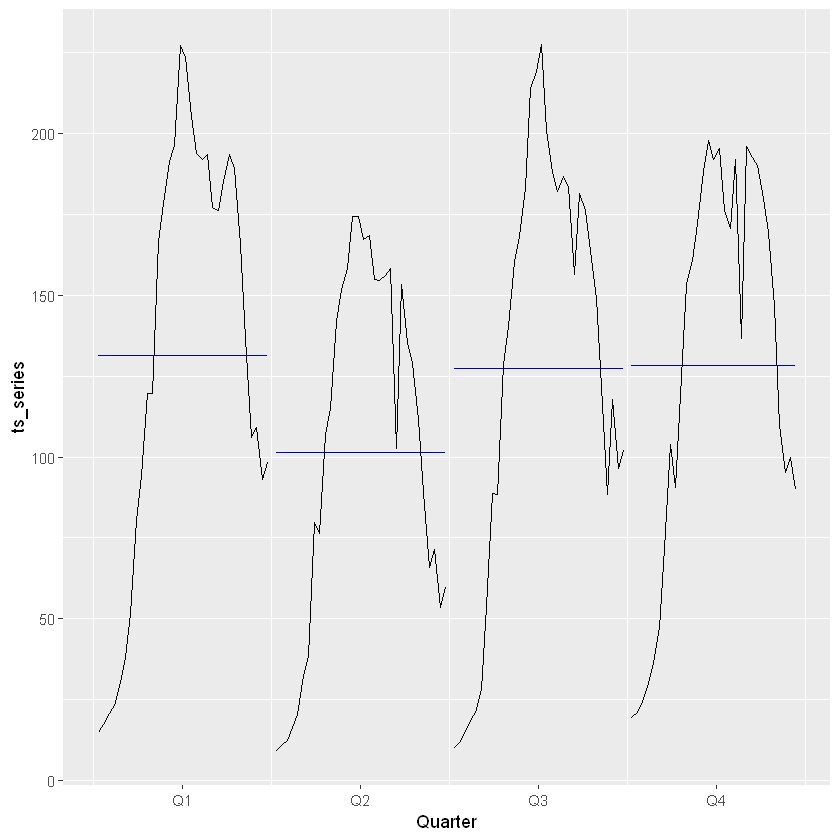

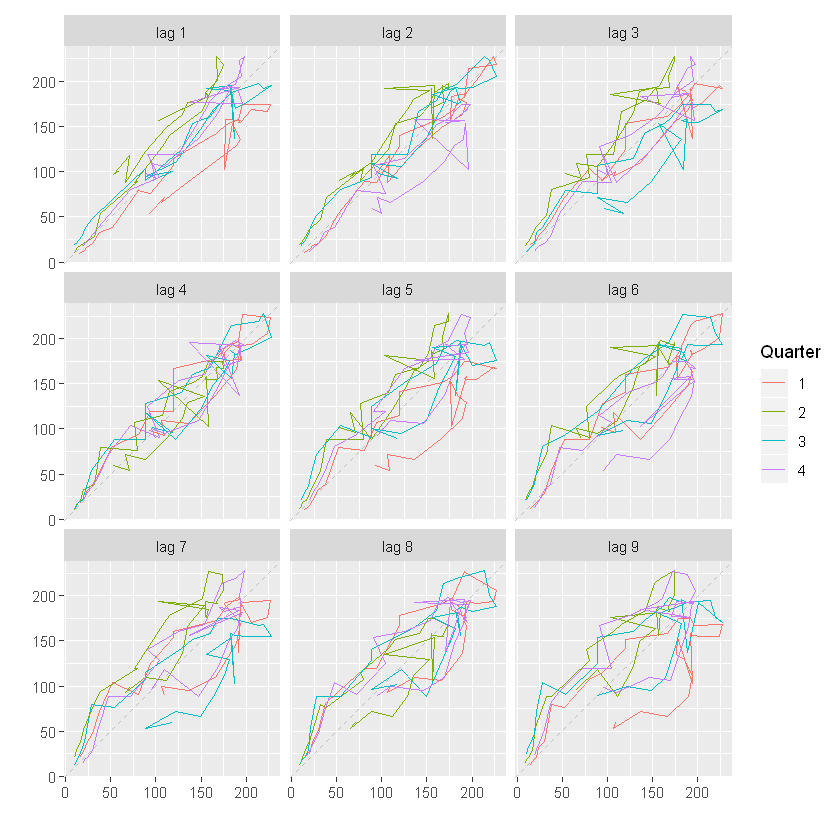

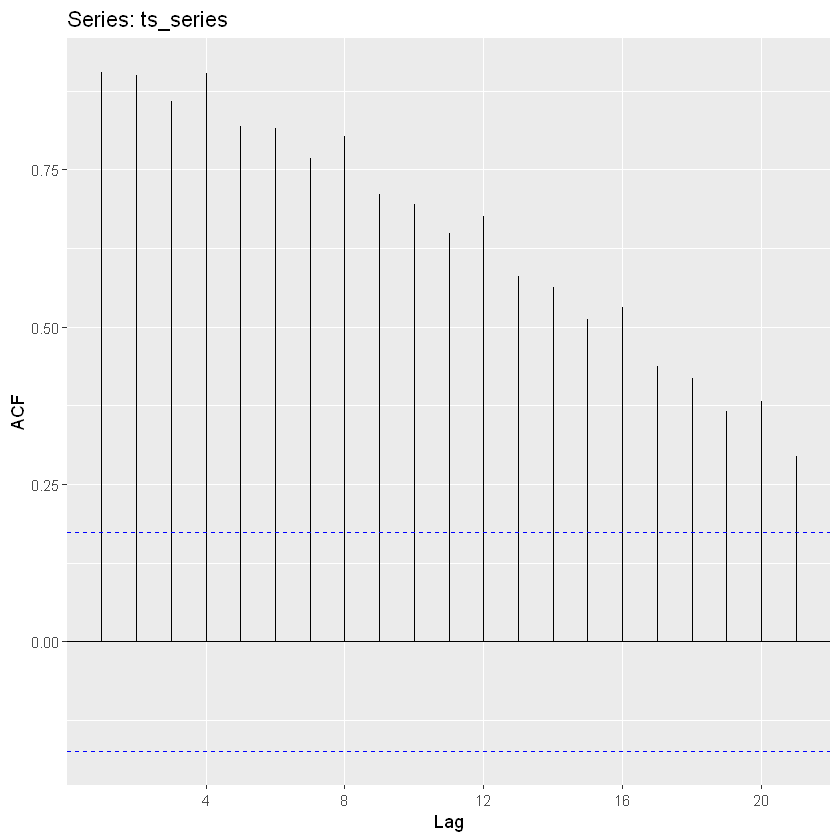

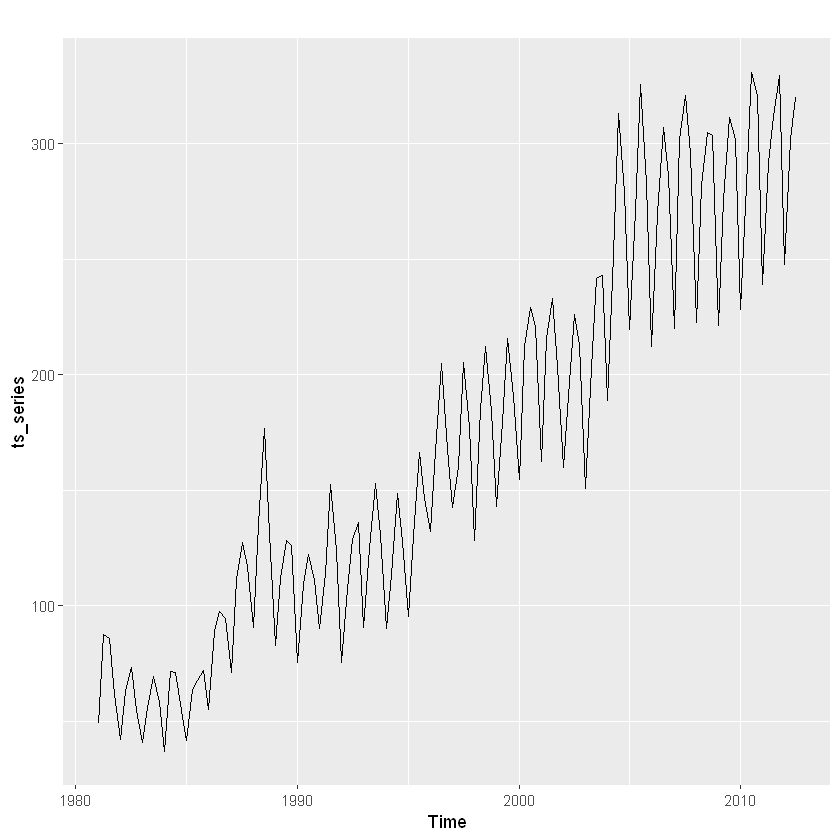

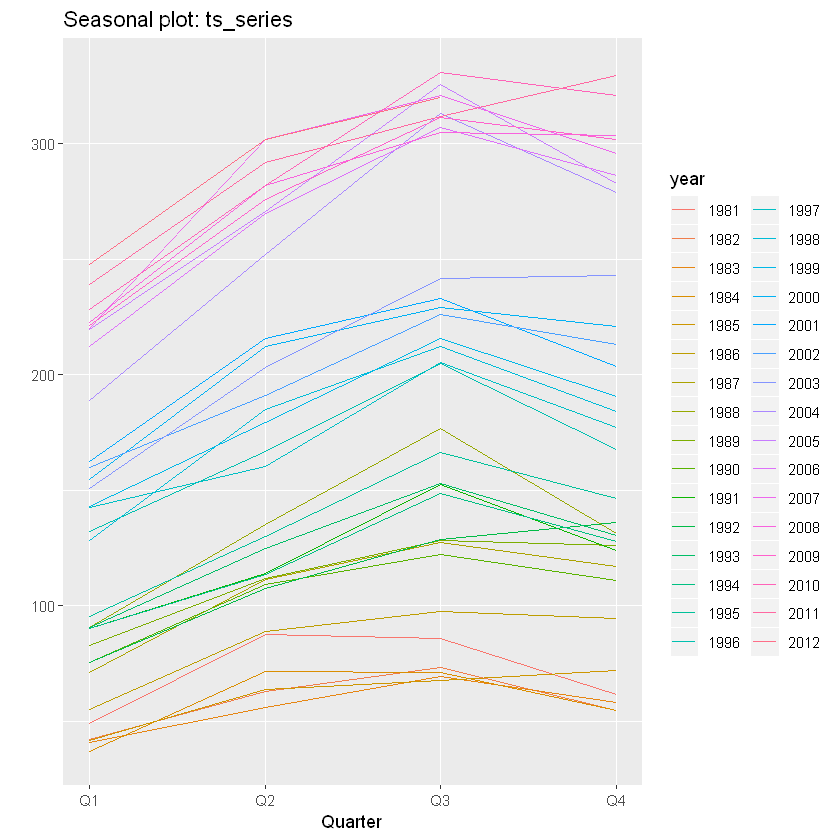

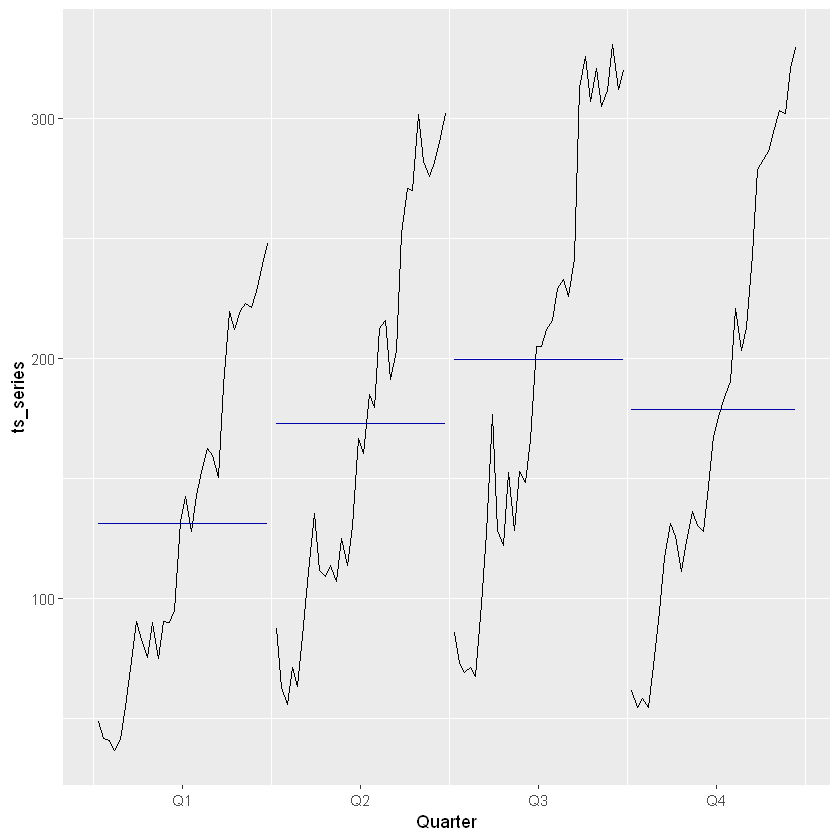

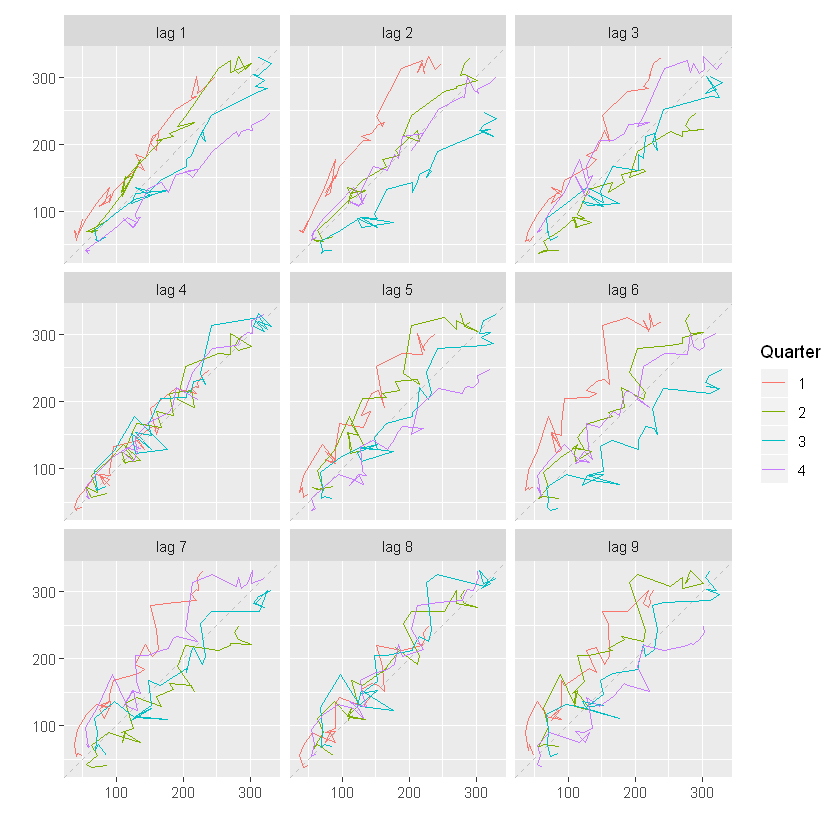

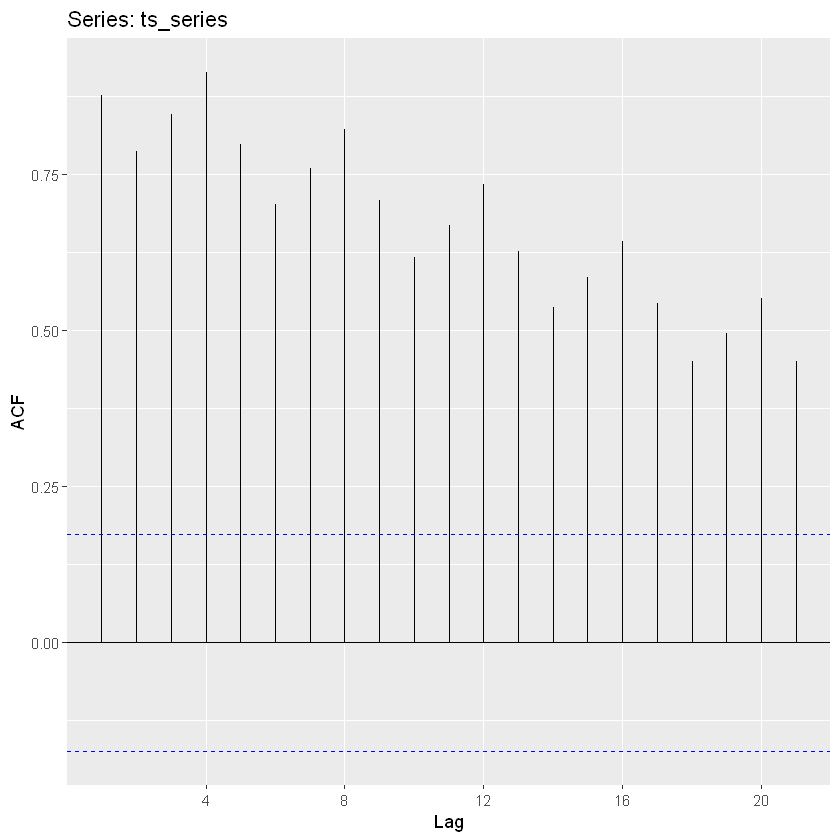

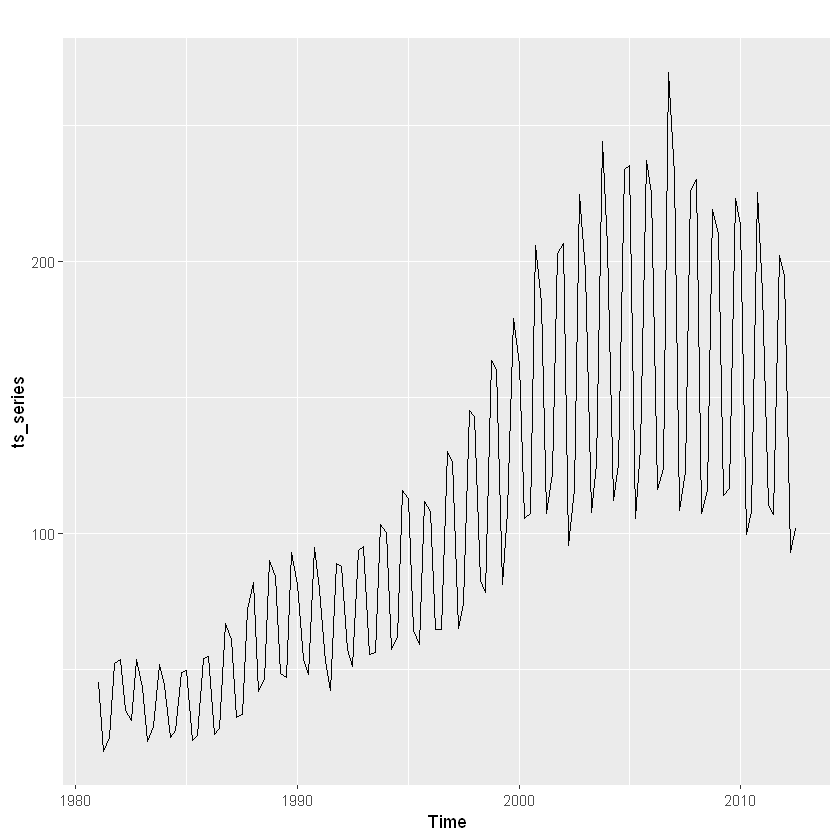

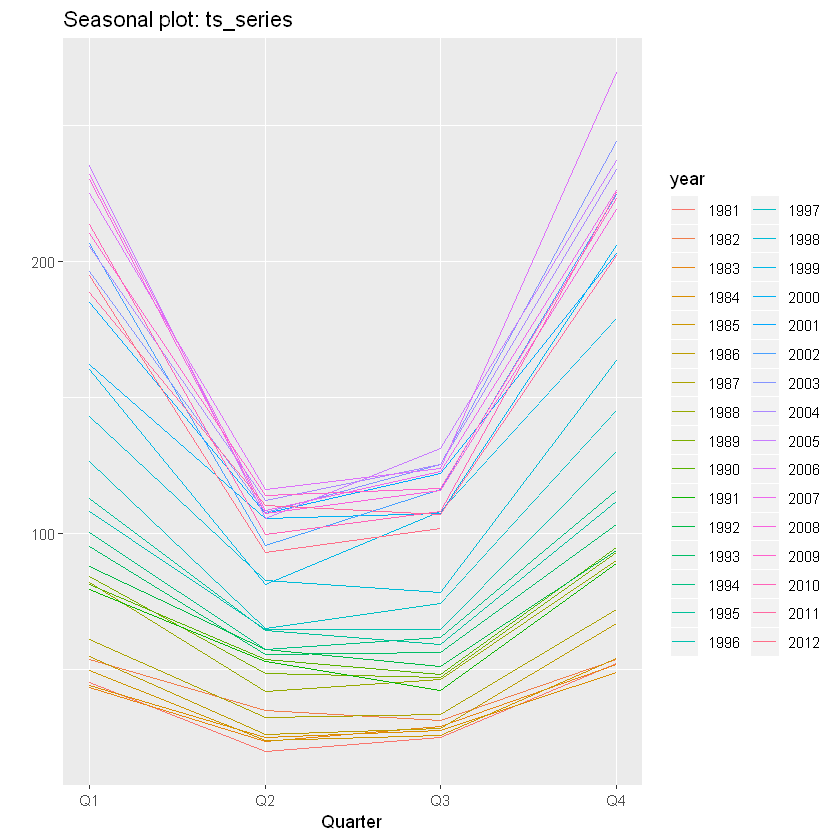

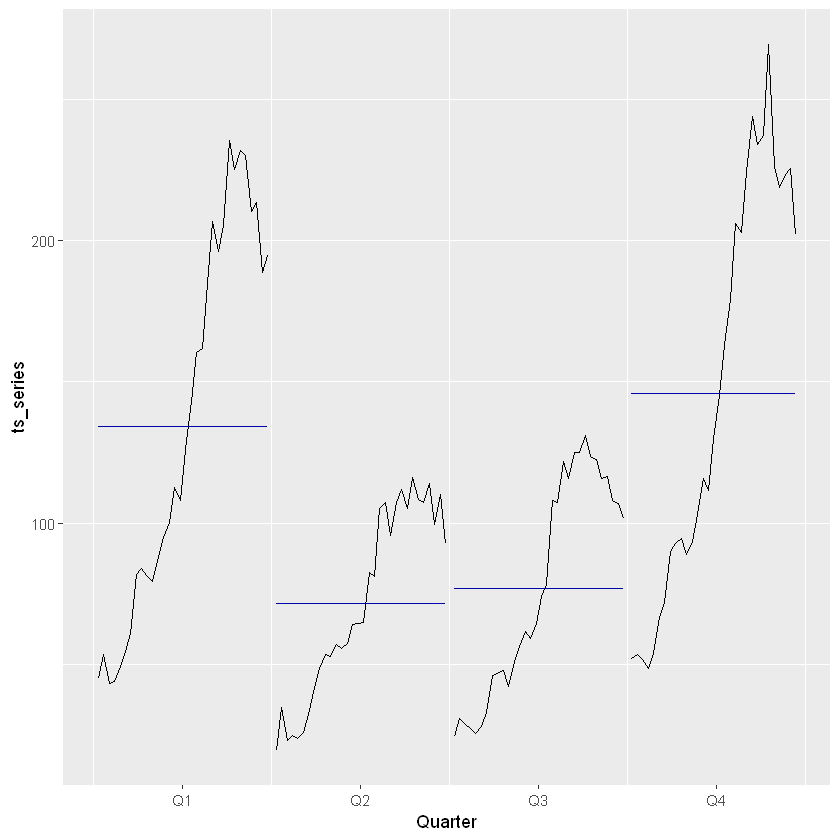

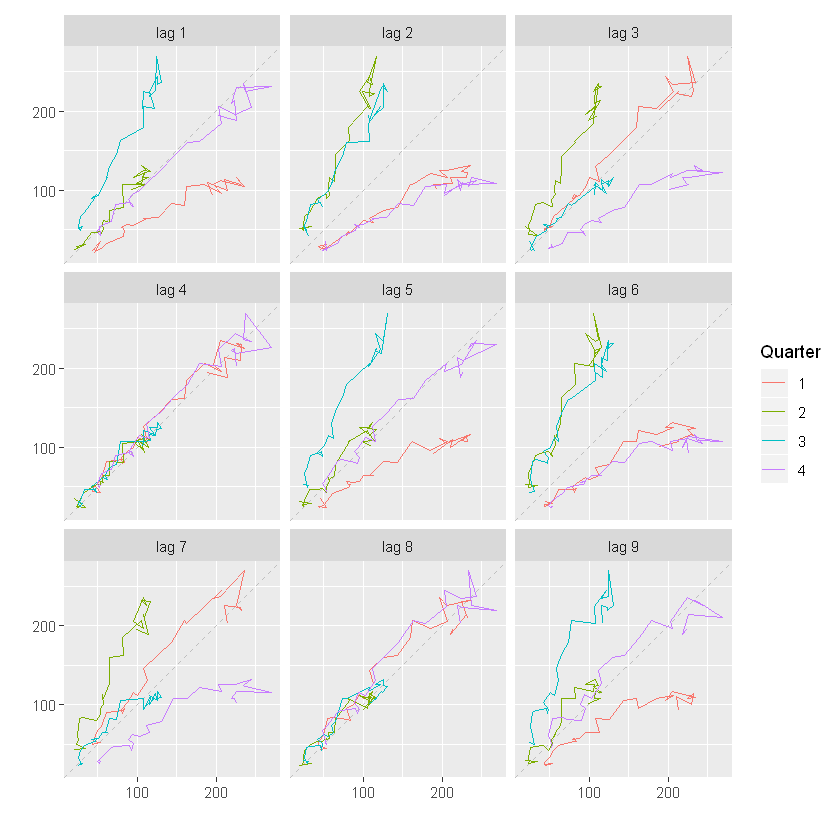

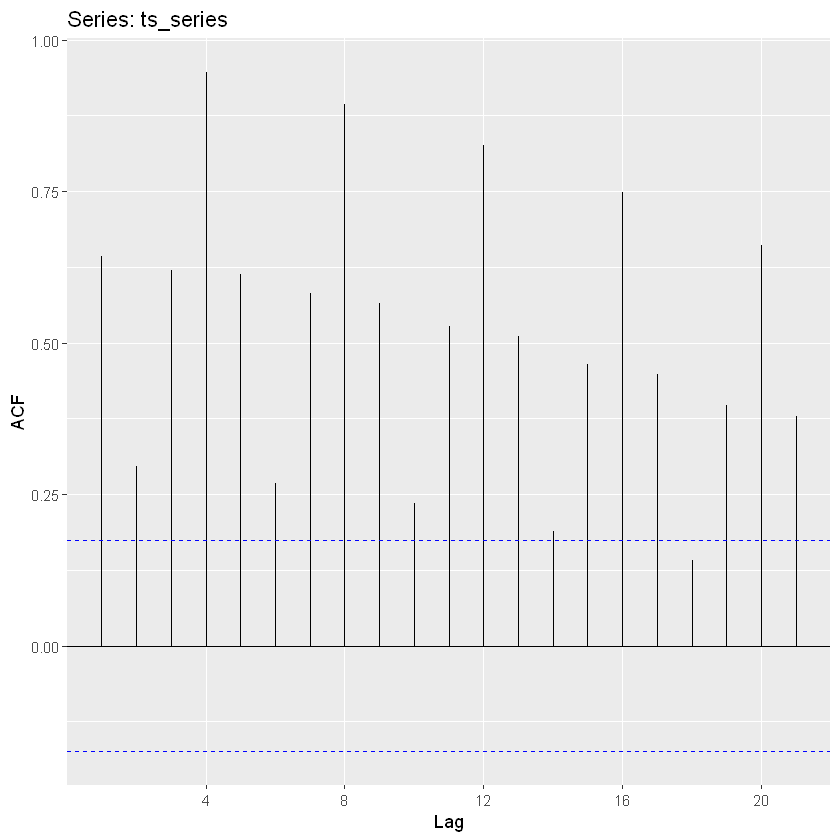

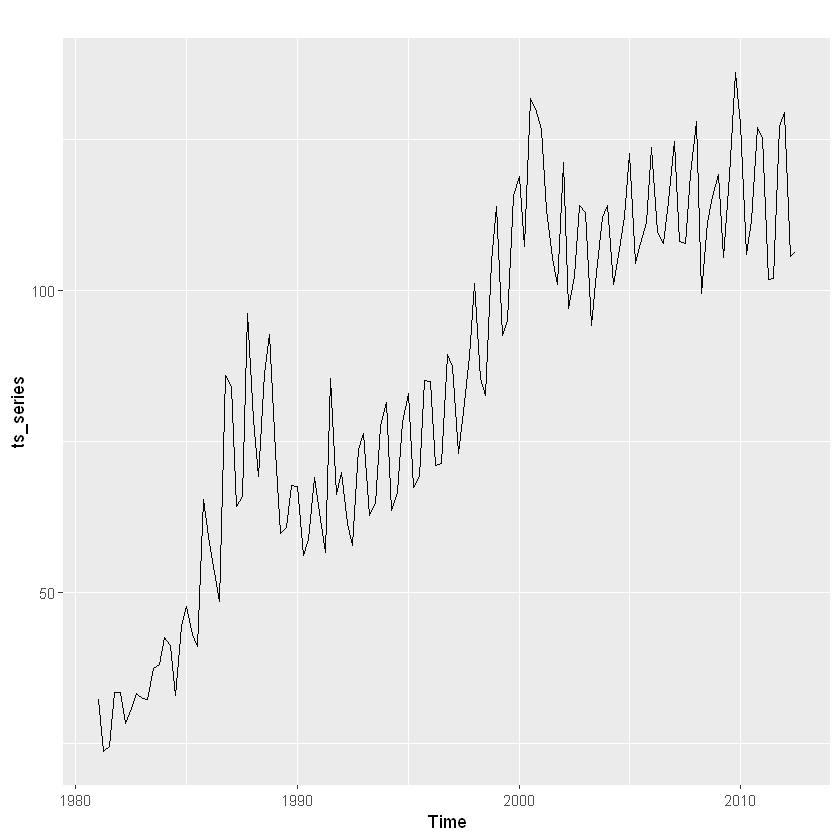

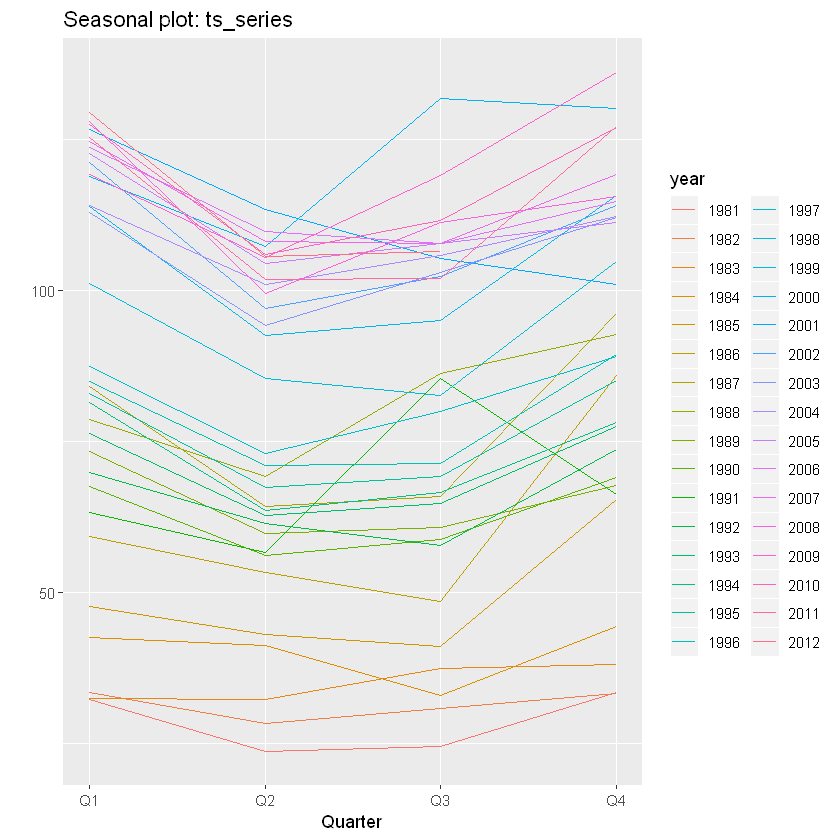

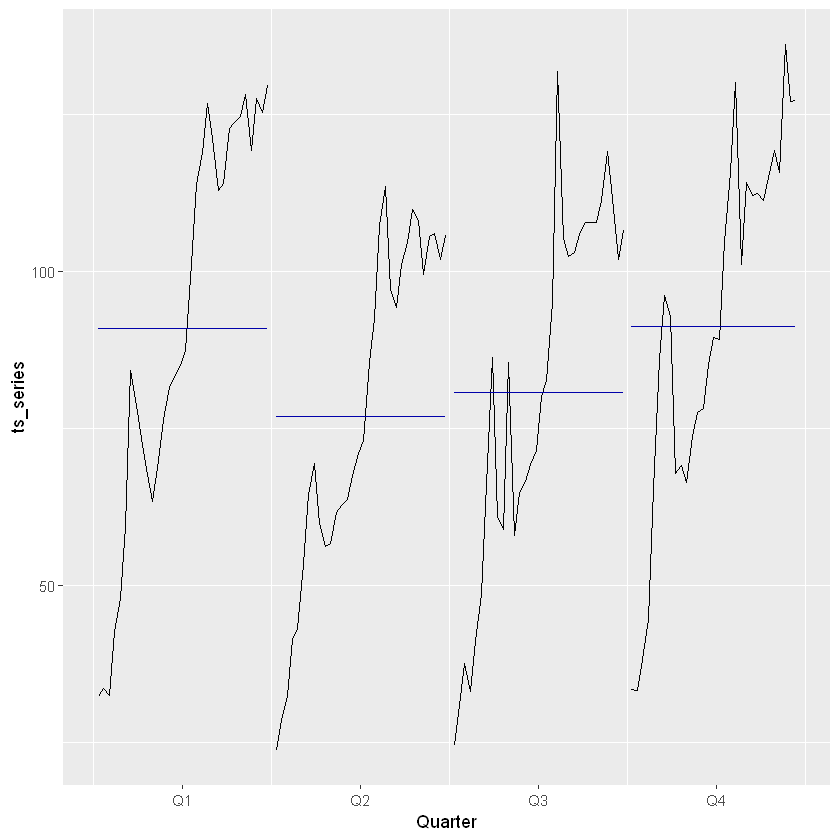

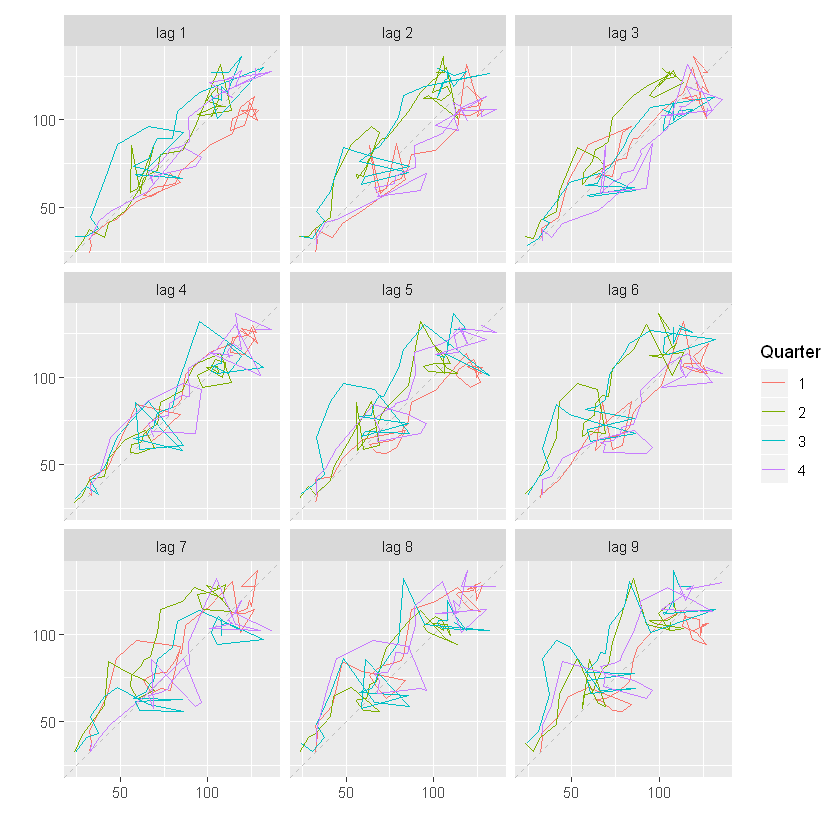

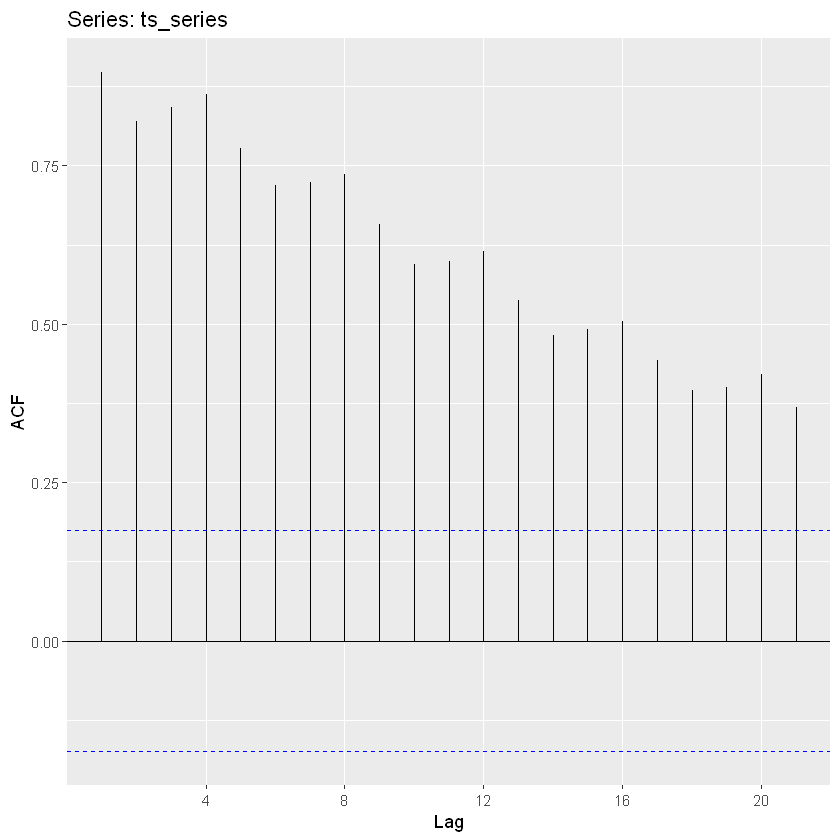

In [66]:
#Analyzing arrivals
series_list3 <- list(arrivals[,1], arrivals[,2], arrivals[,3], arrivals[,4])
for (i in series_list3){
    analyze_ts(i)
    }

### `Q8`

In [84]:
data()

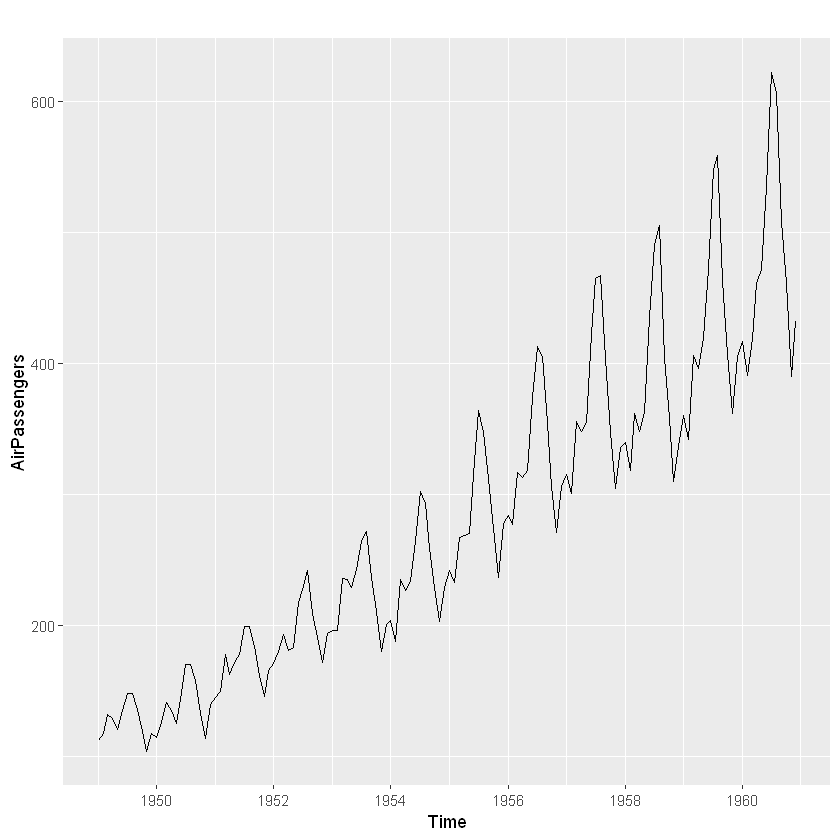

In [80]:
autoplot(AirPassengers)

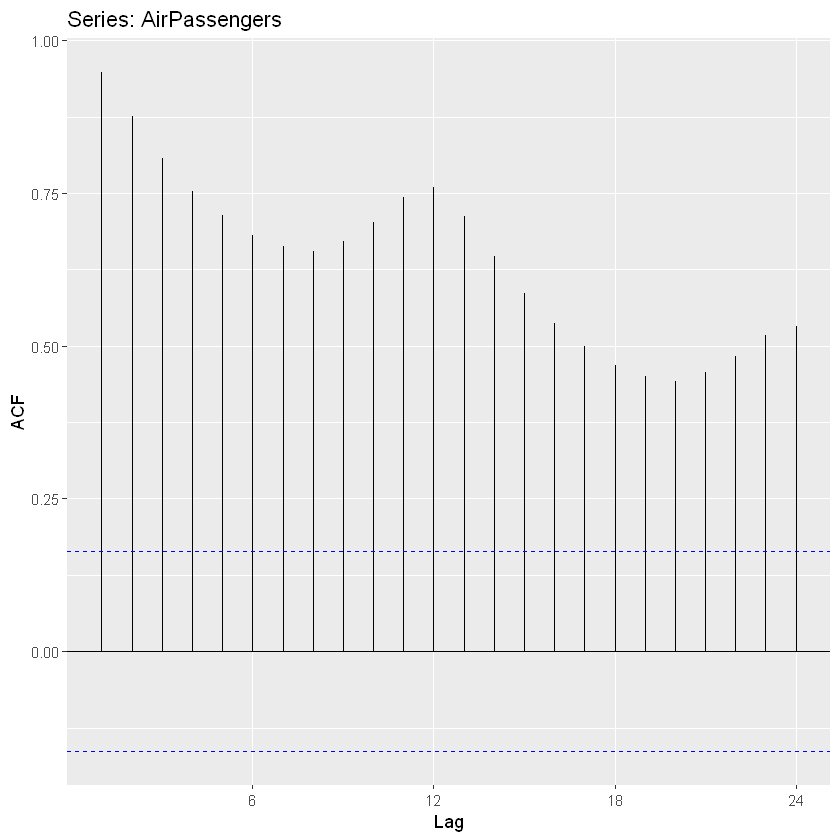

In [81]:
ggAcf(AirPassengers)

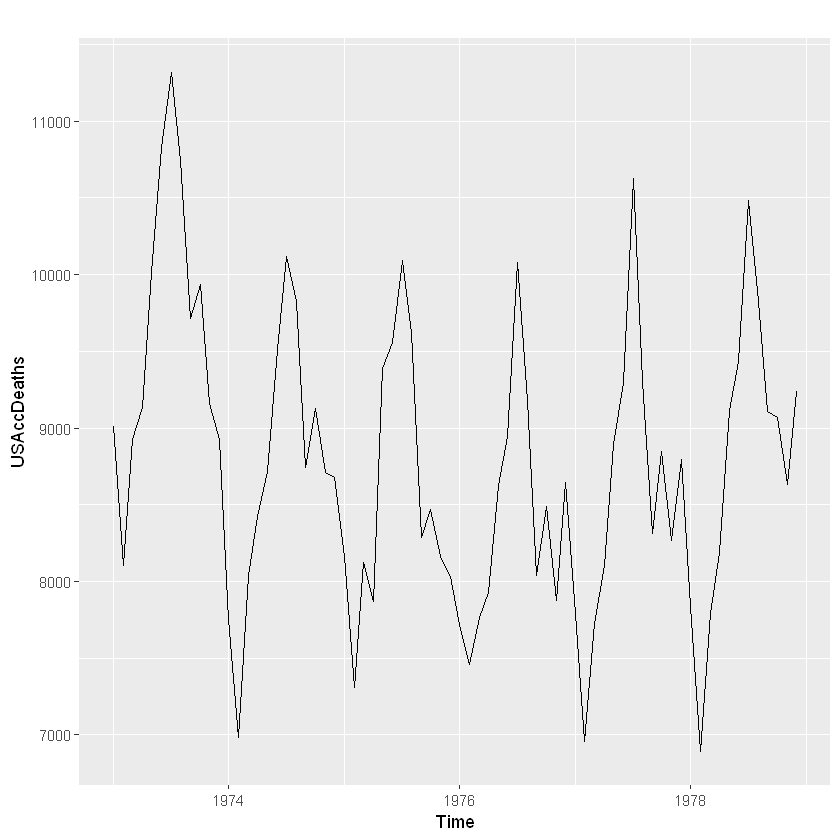

In [83]:
autoplot(USAccDeaths)

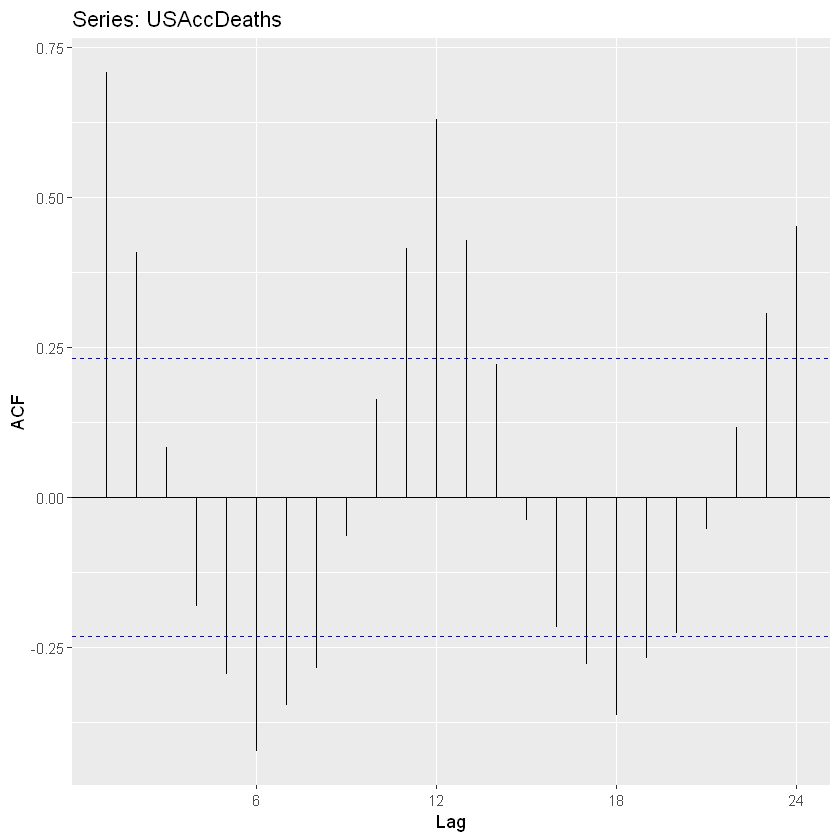

In [82]:
ggAcf(USAccDeaths)

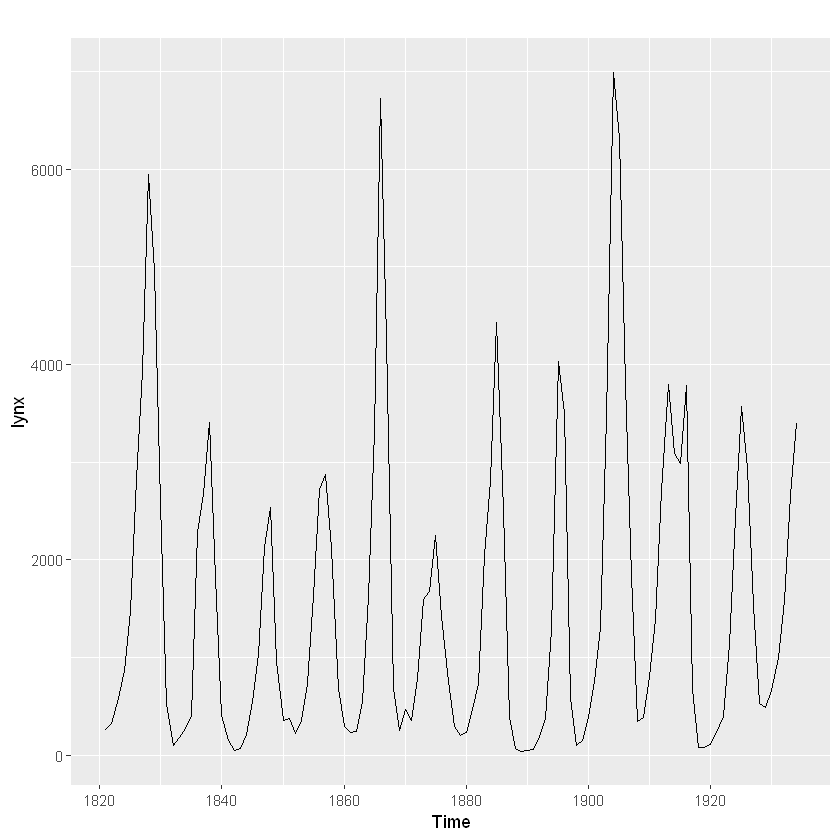

In [85]:
autoplot(lynx)

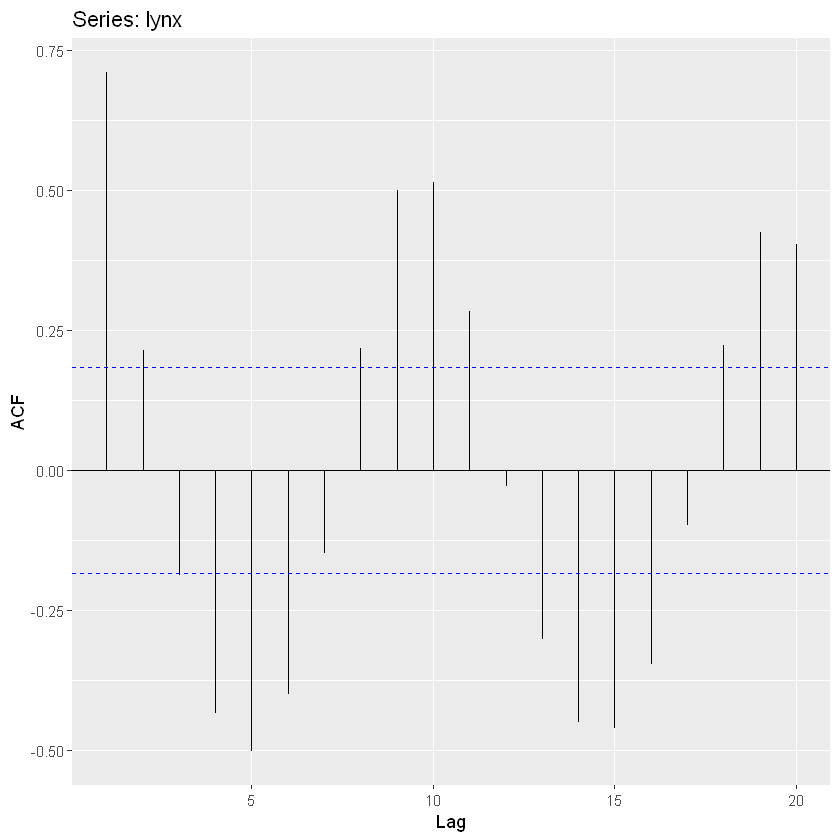

In [86]:
ggAcf(lynx)

### `Q9`

In [67]:
mypigs <- window(pigs, start=1990)

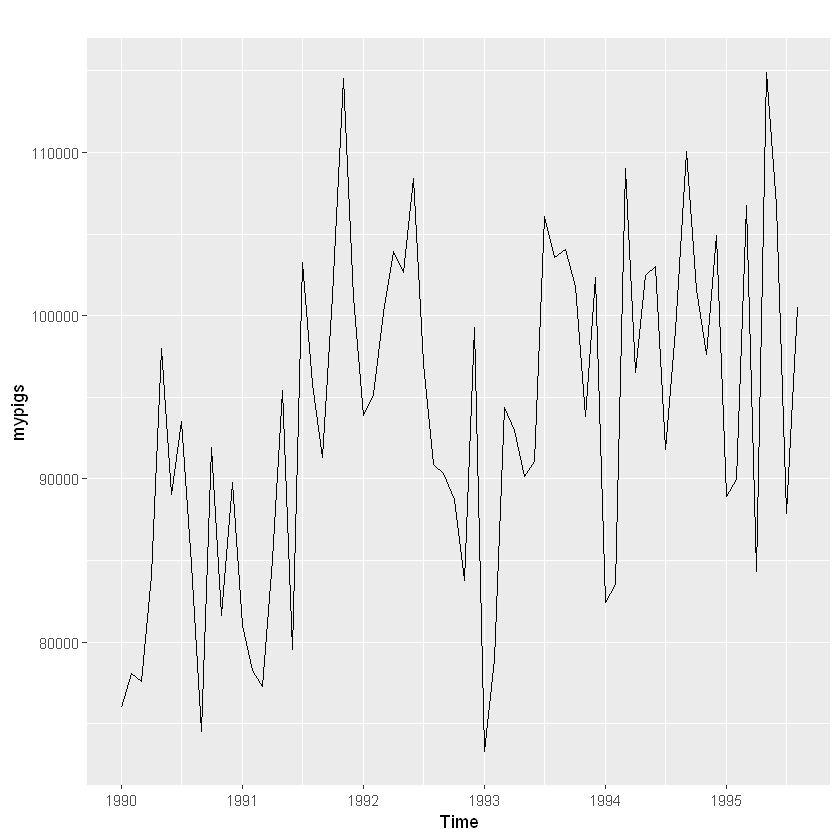

In [68]:
autoplot(mypigs)

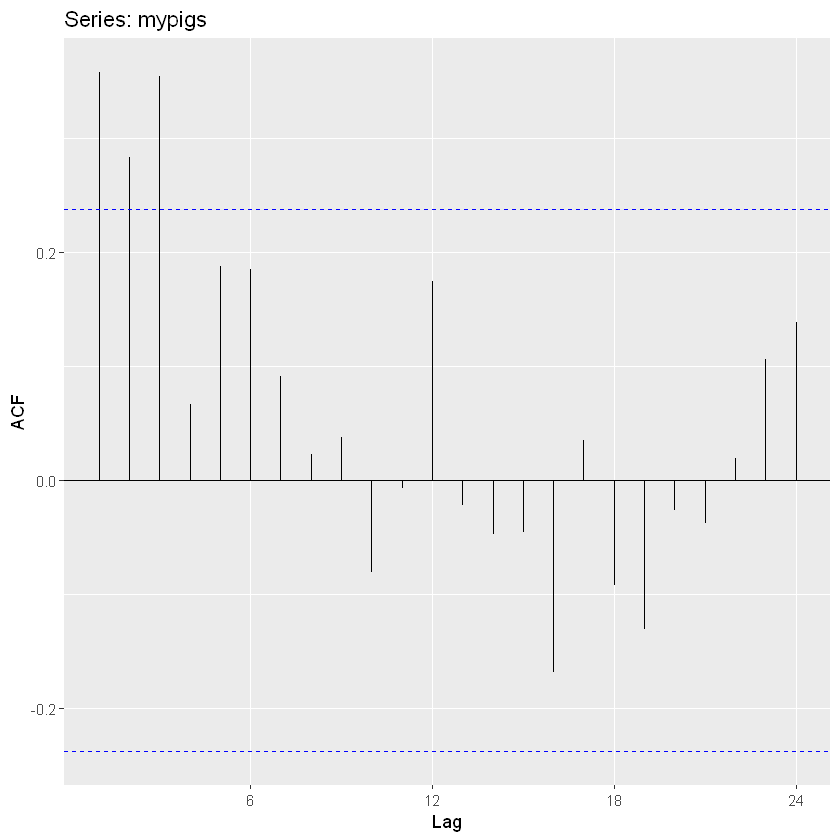

In [69]:
ggAcf(mypigs)

### `Q10`

In [70]:
ddj <- diff(dj)

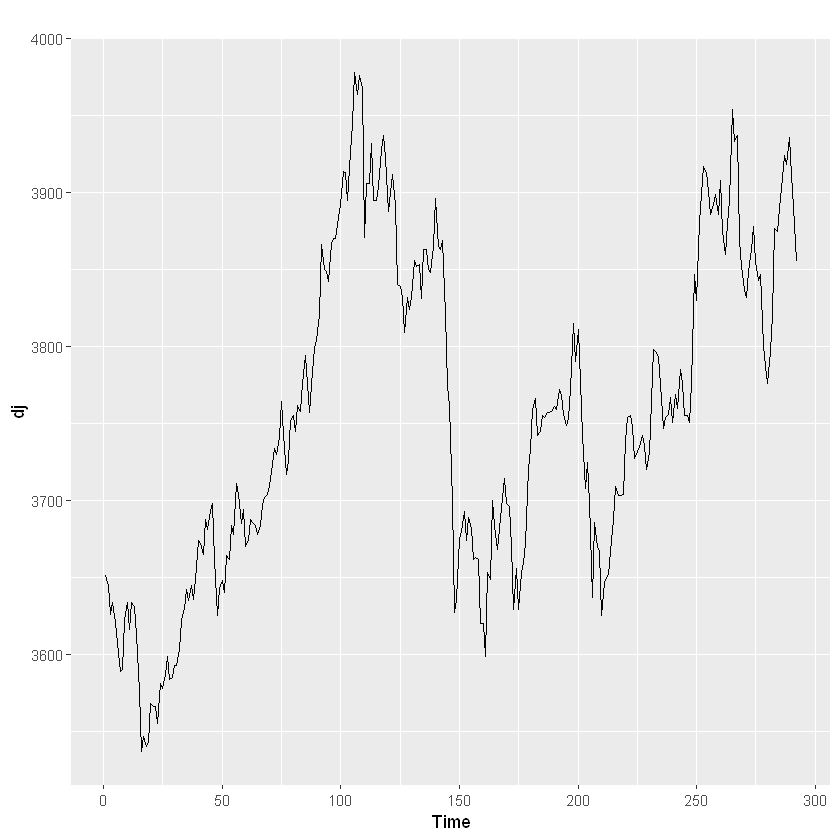

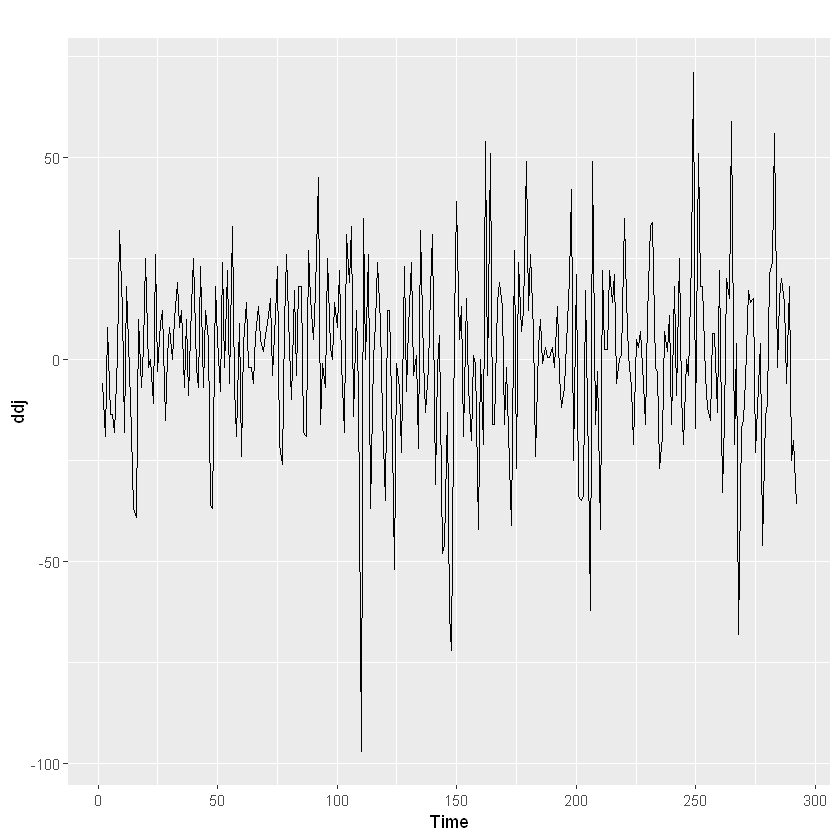

In [72]:
print(autoplot(dj))
print(autoplot(ddj))

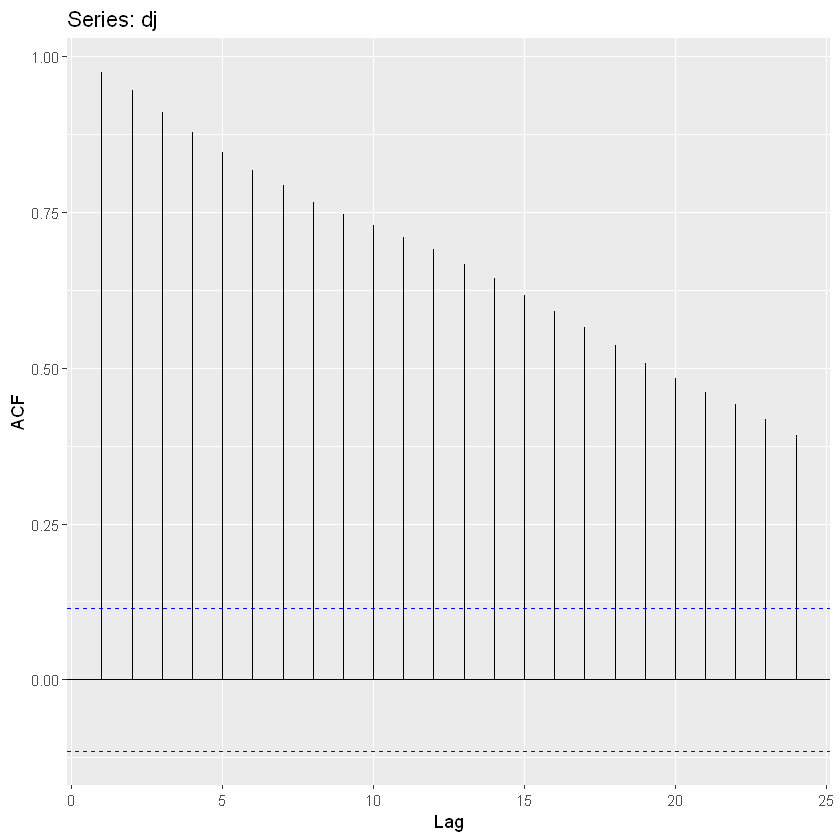

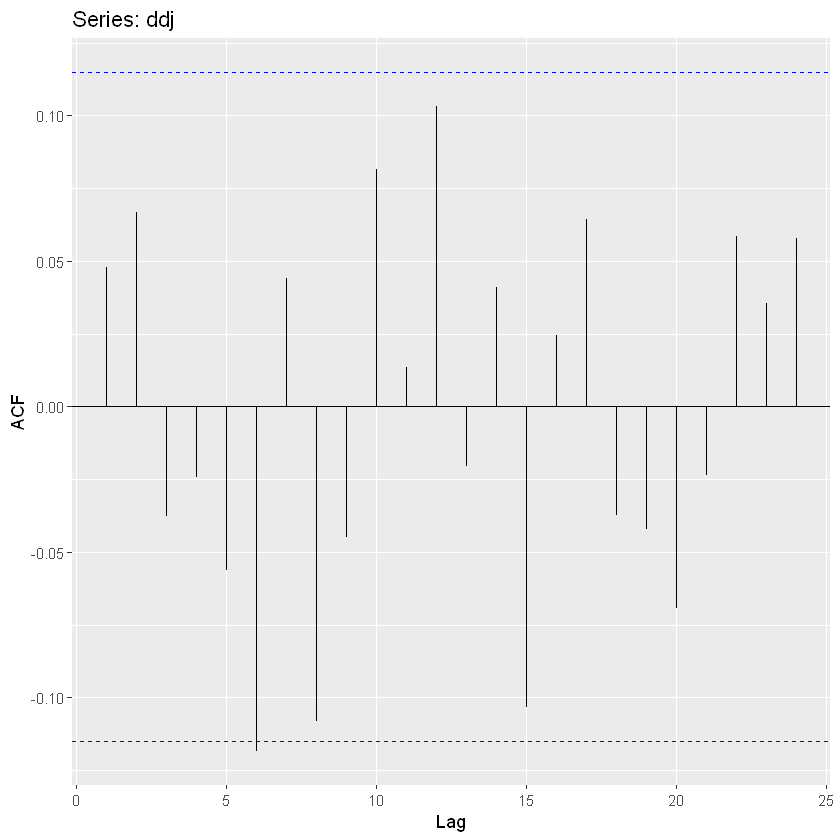

In [73]:
print(ggAcf(dj))
print(ggAcf(ddj))

In [75]:
ls('package:fpp2')

[1] "a10"         "arrivals"    "ausair"      "ausbeer"     "auscafe"    
 [6] "austa"       "austourists" "calls"       "debitcards"  "departures" 
[11] "elecdaily"   "elecdemand"  "elecequip"   "elecsales"   "euretail"   
[16] "gasoline"    "goog"        "goog200"     "guinearice"  "h02"        
[21] "hyndsight"   "insurance"   "livestock"   "marathon"    "maxtemp"    
[26] "melsyd"      "mens400"     "oil"         "prison"      "prisonLF"   
[31] "qauselec"    "qcement"     "qgas"        "sunspotarea" "uschange"   
[36] "usmelec"     "visnights"   "wmurders"

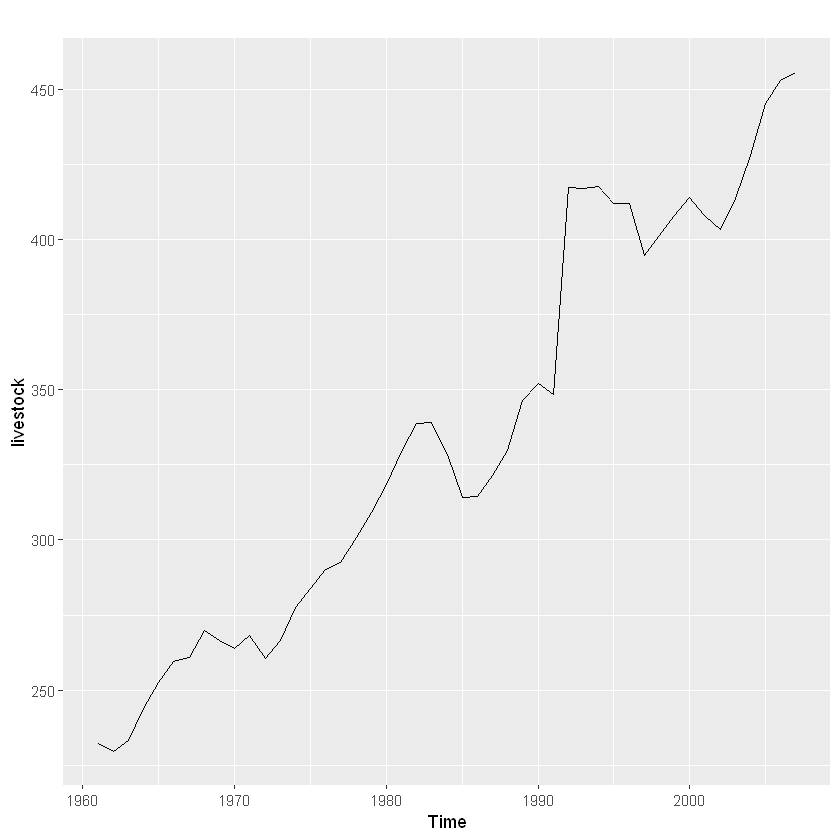

In [76]:
autoplot(livestock)

In [49]:
autoscroll_set_on_load

ERROR: Error in eval(expr, envir, enclos): object 'autoscroll_set_on_load' not found


`Experimenting`

In [ ]:
tse <- ts(1.15**(1:30))

In [ ]:
fit <- auto.arima(tse)

In [ ]:
fcst <- forecast(fit, horizon = 10)

In [ ]:
tsf <- as.vector(fcst$mean)
tsf

In [ ]:
tsf1<- as.vector(tse)
tsf1

In [ ]:
plot(1:length(tsf), tsf, type = 'b')

In [87]:
2


[1] 2